# Multi-Class Text Classification with Scikit-Learn

data source 

https://www.kaggle.com/dushyantv/consumer_complaints

## Data Exploration

In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [4]:
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [5]:
df['Consumer Complaint']

0                                                        NaN
1          I have outdated information on my credit repor...
2          I purchased a new car on XXXX XXXX. The car de...
3                                                        NaN
4                                                        NaN
                                 ...                        
1025005                                                  NaN
1025006    I had an account with XXXX in XX/XX/XXXX this ...
1025007    I was contacted on XX/XX/XXXX email by XXXX fr...
1025008                                                  NaN
1025009    I had a debit that was included in my chapter ...
Name: Consumer Complaint, Length: 1025010, dtype: object

In [10]:
col = ['Product', 'Consumer Complaint']
df = df[col]

print(df.columns)
df

Index(['Product', 'Consumer Complaint'], dtype='object')


,Product,Consumer Complaint
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN
...,...,...
1025005,Debt collection,NaN
1025006,Debt collection,I had an account with XXXX in XX/XX/XXXX this ...
1025007,Mortgage,I was contacted on XX/XX/XXXX email by XXXX fr...
1025008,Debt collection,NaN


In [17]:
from io import StringIO

df = df[pd.notnull(df['Consumer Complaint'])]

df

,Product,Consumer Complaint
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...
...,...,...
1025002,Debt collection,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...
1025003,Bank account or service,"On XXXX/XXXX/13, without my authorization, Ban..."
1025006,Debt collection,I had an account with XXXX in XX/XX/XXXX this ...
1025007,Mortgage,I was contacted on XX/XX/XXXX email by XXXX fr...


In [19]:
df.columns = ['Product', 'Consumer_complaint_narrative']

df

,Product,Consumer_complaint_narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...
...,...,...
1025002,Debt collection,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...
1025003,Bank account or service,"On XXXX/XXXX/13, without my authorization, Ban..."
1025006,Debt collection,I had an account with XXXX in XX/XX/XXXX this ...
1025007,Mortgage,I was contacted on XX/XX/XXXX email by XXXX fr...


In [20]:
df.columns

Index(['Product', 'Consumer_complaint_narrative'], dtype='object')

In [22]:
df.Product.unique()

array(['Credit reporting', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit card', 'Other financial service',
       'Bank account or service', 'Student loan', 'Money transfers',
       'Payday loan', 'Prepaid card',
       'Money transfer, virtual currency, or money service',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Vehicle loan or lease',
       'Credit card or prepaid card', 'Virtual currency',
       'Payday loan, title loan, or personal loan'], dtype=object)

In [24]:
df['category_id'] = df['Product'].factorize()[0]
df

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
...,...,...,...
1025002,Debt collection,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,2
1025003,Bank account or service,"On XXXX/XXXX/13, without my authorization, Ban...",6
1025006,Debt collection,I had an account with XXXX in XX/XX/XXXX this ...,2
1025007,Mortgage,I was contacted on XX/XX/XXXX email by XXXX fr...,3


In [25]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [26]:
category_id_df.values

array([['Credit reporting', 0],
       ['Consumer Loan', 1],
       ['Debt collection', 2],
       ['Mortgage', 3],
       ['Credit card', 4],
       ['Other financial service', 5],
       ['Bank account or service', 6],
       ['Student loan', 7],
       ['Money transfers', 8],
       ['Payday loan', 9],
       ['Prepaid card', 10],
       ['Money transfer, virtual currency, or money service', 11],
       ['Credit reporting, credit repair services, or other personal consumer reports',
        12],
       ['Checking or savings account', 13],
       ['Vehicle loan or lease', 14],
       ['Credit card or prepaid card', 15],
       ['Virtual currency', 16],
       ['Payday loan, title loan, or personal loan', 17]], dtype=object)

In [27]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15,
 'Virtual currency': 16,
 'Payday loan, title loan, or personal loan': 17}

In [28]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

In [29]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


## Imbalanced Classes

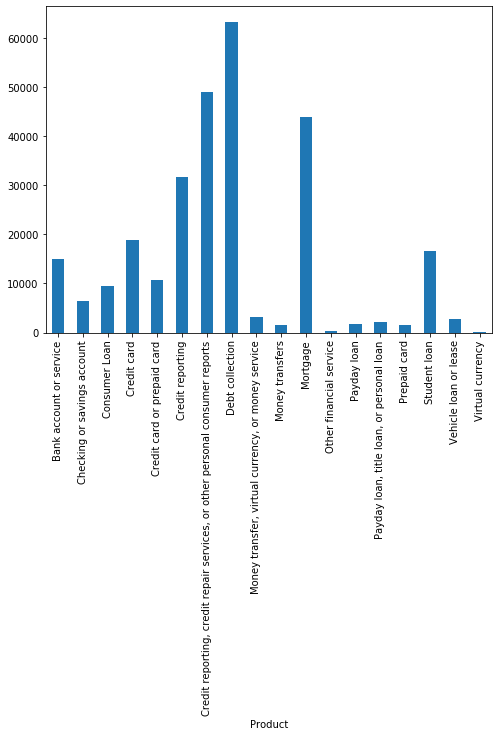

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

## Text Representation

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [38]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
features

<277814x559018 sparse matrix of type '<class 'numpy.float64'>'
	with 31564642 stored elements in Compressed Sparse Row format>

In [40]:
labels = df.category_id
labels

1          0
2          1
7          0
12         2
16         2
          ..
1025002    2
1025003    6
1025006    2
1025007    3
1025009    2
Name: category_id, Length: 277814, dtype: int64

In [41]:
category_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15,
 'Virtual currency': 16,
 'Payday loan, title loan, or personal loan': 17}

In [42]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. car loan
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. verify accounts
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. report understanding
. m

## Multi-Class Classifier: Features and Design

In [44]:
df

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
...,...,...,...
1025002,Debt collection,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,2
1025003,Bank account or service,"On XXXX/XXXX/13, without my authorization, Ban...",6
1025006,Debt collection,I had an account with XXXX in XX/XX/XXXX this ...,2
1025007,Mortgage,I was contacted on XX/XX/XXXX email by XXXX fr...,3


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [45]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [47]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


## Model Selection

Logistic Regression

(Multinomial) Naive Bayes

Linear Support Vector Machine

Random Forest

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_df

""
0
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


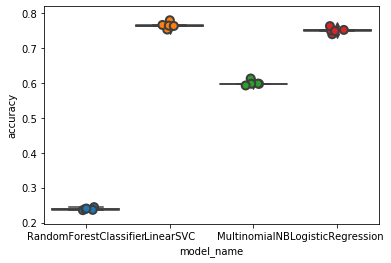

In [49]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [50]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.765728
LogisticRegression        0.751179
MultinomialNB             0.600092
RandomForestClassifier    0.239120
Name: accuracy, dtype: float64

## Model Evaluation

### LinearSVC

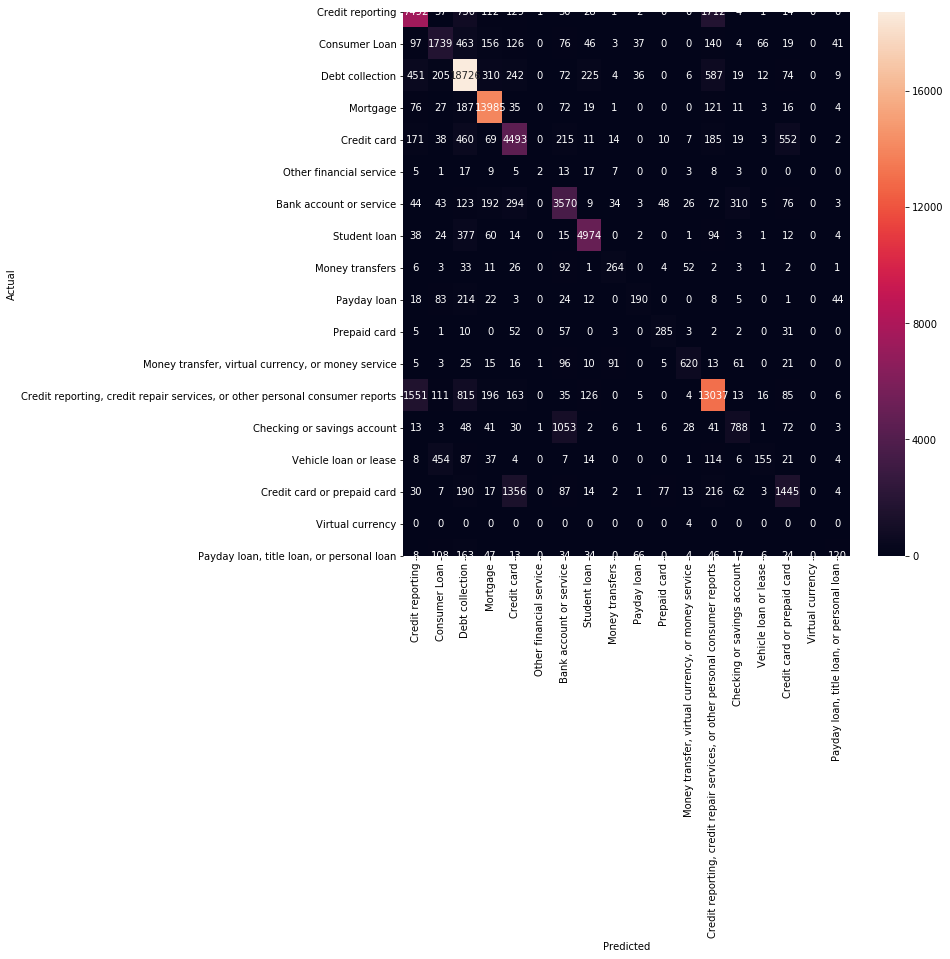

In [51]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Consumer Loan' predicted as 'Credit reporting' : 97 examples.


,Product,Consumer_complaint_narrative
457509,Consumer Loan,I HAVE NO CLUE WHO THIS BANK IS BUT REPORTED A...
769677,Consumer Loan,The attached company claims that the account w...
717836,Consumer Loan,This company have put a duplicate accounts on ...
73133,Consumer Loan,Auto loan closed and payoff ans dhow open with...
7107,Consumer Loan,"While reviewing my XXXX credit report, I notic..."
...,...,...
743356,Consumer Loan,Clear violation of Equal Credit Opportunity Ac...
142497,Consumer Loan,This creditor is stating that account is XXXX ...
989822,Consumer Loan,The company has failed to properly update my c...
433496,Consumer Loan,Completed an inquiry with Lending XXXX to refi...



'Debt collection' predicted as 'Credit reporting' : 451 examples.


,Product,Consumer_complaint_narrative
536393,Debt collection,I have paid off my debt in full with CITI bank...
888667,Debt collection,I am writing about a collection on my experian...
649087,Debt collection,"I KNOW NO COMPANY OF XXXX XXXX, I NEVER LIVED ..."
769529,Debt collection,CONTINUES TO REPORT AS A NEGATIVE ACCOUNT ALSO...
527756,Debt collection,XXXX KEPT COLLECTING ON THE TRADELINE OWNED BY...
...,...,...
7256,Debt collection,Violation of failing or refusing to validate d...
133077,Debt collection,After reviewing my credit report I found infor...
921816,Debt collection,Equifax continues to report a lien on credit r...
165446,Debt collection,I disputed the issues with Amsher. This inform...



'Mortgage' predicted as 'Credit reporting' : 76 examples.


,Product,Consumer_complaint_narrative
688812,Mortgage,transunion credit reporting refuses to correct...
606139,Mortgage,Experian 's credit report still has not update...
927041,Mortgage,I been trying to settle this account for sever...
371089,Mortgage,"Incorrect plaintiff foreclosed on me, forcing ..."
21443,Mortgage,Here 's the documentation you requested. As I ...
...,...,...
790716,Mortgage,This complaint is related to previous complain...
319039,Mortgage,transunion credit bureau has me at a very low ...
27197,Mortgage,I ordered a payoff on XXXX and the company has...
775986,Mortgage,I settled my mortgage account in XXXX 2014 as ...



'Credit card' predicted as 'Credit reporting' : 171 examples.


,Product,Consumer_complaint_narrative
737838,Credit card,"In XXXX 2016, I called my credit card provider..."
479984,Credit card,A credit card I had not requested supplied inc...
352176,Credit card,I submitted a dispute on my charge card and ad...
374516,Credit card,Citicorp refuses to remove fraudulent inquiry ...
21627,Credit card,Have disputed the reporting of the status of a...
...,...,...
322420,Credit card,I have a payment plan with Associated Bank aka...
754196,Credit card,Synchrony Bank/Care Credit is committing fraud...
768823,Credit card,i never had this account
534633,Credit card,The Home Depot/CBNA account # XXXX is showing ...



'Bank account or service' predicted as 'Credit reporting' : 44 examples.


,Product,Consumer_complaint_narrative
673910,Bank account or service,Harris Bank electronically deleted a good fait...
33390,Bank account or service,Chex Systems is not complying with federal law...
485684,Bank account or service,"I applied for credit for XXXX from XXXX XXXX, ..."
617795,Bank account or service,On my XXXX report and it 's a lot if inquires ...
175379,Bank account or service,I went to XXXX to open a checking account on X...
295418,Bank account or service,I tried to apply for a loan online. I was redi...
10666,Bank account or service,On my report from XXXX there is a listing from...
449162,Bank account or service,"On XXXX XXXX, 2016 and XXXX XXXX, 2016 Capital..."
400696,Bank account or service,I received a copy of ChexSystems and noticed I...
310463,Bank account or service,"I had an investment account with XXXX, they we..."



'Student loan' predicted as 'Credit reporting' : 38 examples.


,Product,Consumer_complaint_narrative
647956,Student loan,"Navient has been reporting me as 30, 60, 90, 1..."
787305,Student loan,So I disputed an account on my credit report a...
782934,Student loan,On XXXX/XXXX/2015 I paid off account # XXXX in...
14744,Student loan,Citi bank loan number XXXX for {$6900.00} tran...
276912,Student loan,I contacted Access Group back in XXXX XXXX abo...
249194,Student loan,This dispute involves incomplete and inaccurat...
64611,Student loan,I have like XXXX accounts showing as negitive ...
394449,Student loan,I settled XXXX CitiBank accounts with XXXX XXX...
166173,Student loan,XXXX is reporting XXXX accounts with XXXX miss...
430553,Student loan,"I am currently in the middle of changes, and g..."



'Payday loan' predicted as 'Credit reporting' : 18 examples.


,Product,Consumer_complaint_narrative
533555,Payday loan,"I applied for a loan for on XXXX XXXX, 2015 fo..."
715581,Payday loan,On XX/XX/XXXX Allied Collection Services locat...
123140,Payday loan,My relative XXXX XXXX used my info to obtain X...
430011,Payday loan,"I 'm not sure I selected the correct option, b..."
3998,Payday loan,My identity was stolen in XX/XX/2009. A XXXX X...
731632,Payday loan,I have sent a copy of my old bank statement sh...
300594,Payday loan,I am a victim of identity theft and someone st...
628901,Payday loan,I am a victim of Identity theft on or about XX...
655911,Payday loan,I received a {$500.00} loan from Kickstand Len...
626015,Payday loan,like 1 1/2 or 2 years ago I got a loan from ra...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 1551 examples.


,Product,Consumer_complaint_narrative
855750,"Credit reporting, credit repair services, or o...",I sent several certified letters to Lexis Nex...
952914,"Credit reporting, credit repair services, or o...",I am currently refinancing my home and consoli...
982785,"Credit reporting, credit repair services, or o...",I disputed some items on all 3 credit bureau X...
903387,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX has inaccurately reported a deb...
987291,"Credit reporting, credit repair services, or o...",I was a victim of TransUnions inquiry issue. I...
...,...,...
930802,"Credit reporting, credit repair services, or o...",Equifax is showing a credit card that I was no...
900678,"Credit reporting, credit repair services, or o...",Transunion is not accurately reporting my on t...
916852,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I mailed a notarized dispute let...
962461,"Credit reporting, credit repair services, or o...",Back on XX/XX/XXXX I disputed a company called...



'Checking or savings account' predicted as 'Credit reporting' : 13 examples.


,Product,Consumer_complaint_narrative
923105,Checking or savings account,They lie my finds was not low I a copy of the ...
927355,Checking or savings account,Our checks are getting declined when written a...
934724,Checking or savings account,I 'm tying to open and account but they will n...
933005,Checking or savings account,around XXXX XXXX i noticed my XXXX account was...
947310,Checking or savings account,My Acount make my creit score very low I think...
816283,Checking or savings account,These are these are Types of fraud. Identity f...
955285,Checking or savings account,"I needed to open a account for direct deposit,..."
87244,Checking or savings account,I had an overdraft for a {$160.00} and paid it...
810349,Checking or savings account,Wrong social security # XXXX my number
954891,Checking or savings account,I have sent three certified mail in regards to...



'Credit card or prepaid card' predicted as 'Credit reporting' : 30 examples.


,Product,Consumer_complaint_narrative
950597,Credit card or prepaid card,I applied for a credit card art my local XXXX ...
1019733,Credit card or prepaid card,I am really confused as to how I was reported ...
1019763,Credit card or prepaid card,Dear Consumer Protection Bureau I have been a ...
996803,Credit card or prepaid card,XXXX provided a credit card service through XX...
856195,Credit card or prepaid card,XXXX I did some purchase fro Paypal Credit. fo...
811452,Credit card or prepaid card,I was supposed to receive a credit for the acc...
829021,Credit card or prepaid card,"Greetings, I have repeadley inquired as to the..."
920264,Credit card or prepaid card,I filed bankruptcy and capital one was added t...
962647,Credit card or prepaid card,I never received my bills / email stating I wa...
923889,Credit card or prepaid card,I ordered furniture with this card and they im...



'Credit reporting' predicted as 'Consumer Loan' : 57 examples.


,Product,Consumer_complaint_narrative
487213,Credit reporting,"I had a car through XXXX XXXX, and it was a po..."
561031,Credit reporting,My car. Was repossessed after 5 year ayments T...
644038,Credit reporting,This corporation unjustifiably has turned nega...
169234,Credit reporting,I received a letter in the mail from a car loa...
775762,Credit reporting,Dear Sir or Madam : We are writing to dispute ...
51495,Credit reporting,"As part of our divorce settlement, my ex wife ..."
149313,Credit reporting,I requested contracts bearing my signature and...
669102,Credit reporting,I requested contracts bearing my signature and...
642049,Credit reporting,"Hopefully, I have chosen the right avenue to l..."
453244,Credit reporting,i purchased and financed an engagement ring fo...



'Debt collection' predicted as 'Consumer Loan' : 205 examples.


,Product,Consumer_complaint_narrative
495006,Debt collection,XX/XX/XXXX my wife and I had our XXXX Kia Opti...
417498,Debt collection,"turned in leased vehicle, which I was suppose ..."
388352,Debt collection,I have a loan with a company called One Main F...
898827,Debt collection,As ofXX/XX/XXXX Hyundai Finance is reporting a...
978769,Debt collection,I got a new car in 2016. I had a 72 month note...
...,...,...
613013,Debt collection,I am the XXXX and was contacted by Flagship XX...
942023,Debt collection,I have an XXXX XXXX XXXX that was paid on time...
306170,Debt collection,I got a loan with one main financial in XXXX X...
938881,Debt collection,I purchased a vehicle back in XXXX and it was ...



'Mortgage' predicted as 'Consumer Loan' : 27 examples.


,Product,Consumer_complaint_narrative
46439,Mortgage,For XXXX months I have been trying to access m...
164474,Mortgage,My mortgage company will no longer take paymen...
413329,Mortgage,"I had my payments set up on auto pay, one mont..."
433910,Mortgage,"On XXXX XXXX 2002, I applied for a loan and wa..."
345902,Mortgage,I am frustrated with this entire financial sys...
206980,Mortgage,I have been denied a refinance on my primary r...
114308,Mortgage,The company pulled my credit without my author...
825070,Mortgage,Due to the storm they called me to see if I ha...
941076,Mortgage,I got a loan from XXXX they informed me that i...
516733,Mortgage,"Asked XXXX to defer XXXX payments, was told I ..."



'Credit card' predicted as 'Consumer Loan' : 38 examples.


,Product,Consumer_complaint_narrative
315704,Credit card,When I was approved for my auto loan. The bank...
639084,Credit card,Lobel Financial is in clear violation of the F...
5496,Credit card,I am unable to log in to the Discover website ...
391906,Credit card,"In 2005, we took out what we thought was a loa..."
326150,Credit card,On XXXX XXXX I received the attached letter fr...
345565,Credit card,I open an accouny with dillards onXXXXXXXX mad...
213486,Credit card,I purchased a XXXX ( not diesel ) in XXXX. It ...
482243,Credit card,On my report there are XXXX chase auto loan in...
289590,Credit card,BarclayUS has a cutoff time for XXXX for the m...
155098,Credit card,This is loan that Bank of America should have ...



'Bank account or service' predicted as 'Consumer Loan' : 43 examples.


,Product,Consumer_complaint_narrative
673143,Bank account or service,I applied for a used auto loan through usbank....
153,Bank account or service,This complaint is regarding Wells Fargo. XX/XX...
104376,Bank account or service,I feel like I was discriminated by TD bank in ...
701000,Bank account or service,I cosigned a car loan for my daughter. Her che...
438358,Bank account or service,in XXXX XXXX I contacted 5th third to request ...
246141,Bank account or service,SunTrust Bank received a payoff on a consumer ...
206600,Bank account or service,I think Synchrony Bank needs to be investigate...
39150,Bank account or service,I took my car to XXXX XXXX on XXXX/XXXX/2016. ...
460505,Bank account or service,I have contacted Wells Fargo on three separate...
46510,Bank account or service,SPRINGLEAF FINANCIAL SERVICES made an unauthor...



'Student loan' predicted as 'Consumer Loan' : 24 examples.


,Product,Consumer_complaint_narrative
185695,Student loan,I am talking to a realtor today and a car deal...
225542,Student loan,Well Fargo input my loan as a $ XXXX/month pay...
1024460,Student loan,I filed a separate complaint about XXXX XXXX c...
642880,Student loan,The longevity of my loan is excessive.
274041,Student loan,"Tried paying loan installment XXXX , tried pa..."
708780,Student loan,Monterey Financial has extracted a late fee fr...
232968,Student loan,"I have a loan with Wells Fargo, they are repor..."
668874,Student loan,I had fallen behind on my loan and reached an ...
965814,Student loan,Having problems have been charged for a loan t...
43142,Student loan,We set up payment for interest payment only fo...



'Payday loan' predicted as 'Consumer Loan' : 83 examples.


,Product,Consumer_complaint_narrative
113980,Payday loan,i took out a loan for XXXX dollars and was cha...
503668,Payday loan,I PAID {$99.00} MONEY ORDER ONXXXX. {$98.00} W...
436344,Payday loan,I revoked my ACH authorization because this co...
76156,Payday loan,Originally when I got the loan the agent XXXX ...
636626,Payday loan,I applied to have a loan from a company named ...
...,...,...
773051,Payday loan,An on-line loan was taken out under my name an...
53617,Payday loan,Could n't pay a loan company for a loan due to...
335773,Payday loan,I live in Ohio and took a loan from Westernsky...
422565,Payday loan,94 % interest rate since XXXX I have paid {$44...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 111 examples.


,Product,Consumer_complaint_narrative
928316,"Credit reporting, credit repair services, or o...",Citizens bank is reporting my loan XXXX days p...
877800,"Credit reporting, credit repair services, or o...",I am a cobuyer to an auto loan in XX/XX/XXXX a...
982233,"Credit reporting, credit repair services, or o...","I never had a car loan, I was in XXXX during t..."
917732,"Credit reporting, credit repair services, or o...",I am trying to get a job at XXXX and they rece...
936789,"Credit reporting, credit repair services, or o...",Ally Financial reported that I had a history o...
...,...,...
1016869,"Credit reporting, credit repair services, or o...",I received a letter from Avant that indicated ...
926973,"Credit reporting, credit repair services, or o...",Strategic Automotive transferred my auto loan ...
995769,"Credit reporting, credit repair services, or o...",attachment # 1 subject of complaint drivers li...
267535,"Credit reporting, credit repair services, or o...",I bought a car from XXXX XXXX XXXX and o...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 454 examples.


,Product,Consumer_complaint_narrative
947329,Vehicle loan or lease,"XXXX XXXX, XXXX RE : Swindling consumers selli..."
1001265,Vehicle loan or lease,On Wednesday XX/XX/XXXX Toyota picked up my To...
973288,Vehicle loan or lease,I have insurance on my auto loan with Navy Fed...
869926,Vehicle loan or lease,This complaint is in regard to State Farm Bank...
813336,Vehicle loan or lease,Santander USA is the worst company in the worl...
...,...,...
1020976,Vehicle loan or lease,Had a vehicle that was financed at the Bank th...
931572,Vehicle loan or lease,On XXXX XXXX I contacted my auto finance compa...
992869,Vehicle loan or lease,"To CFPB, The actions of Santander Consumer USA..."
941541,Vehicle loan or lease,I purchased this car from a dealership and was...



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 108 examples.


,Product,Consumer_complaint_narrative
1011430,"Payday loan, title loan, or personal loan",Car was repossessed on Wednesday. Payments wer...
988787,"Payday loan, title loan, or personal loan",I submitted a complaint about an hour or so to...
844103,"Payday loan, title loan, or personal loan",I had a personal loan fro m Mariner Finance th...
995585,"Payday loan, title loan, or personal loan",I have had my Conn 's installment loan for 3 y...
257591,"Payday loan, title loan, or personal loan",My h usband and I are both retired and we did ...
...,...,...
102339,"Payday loan, title loan, or personal loan",I did get a title loan from Ace Check XXXX and...
269570,"Payday loan, title loan, or personal loan",I began taking out RISE loans in XXXX XXXX ...
832910,"Payday loan, title loan, or personal loan",Greensky a cct # XXXX GreenSky will not su...
920780,"Payday loan, title loan, or personal loan",I took out a personal loan with XXXX XXXX in X...



'Credit reporting' predicted as 'Debt collection' : 750 examples.


,Product,Consumer_complaint_narrative
239549,Credit reporting,In 2007 I was moving and canceling my XXXX cab...
675489,Credit reporting,"In reviewing my credit score online, I discove..."
720328,Credit reporting,I continue to be harassed by XXXX XXXX. They a...
361863,Credit reporting,no verification of signature or contract
551546,Credit reporting,I have a charge off account with University XX...
...,...,...
698711,Credit reporting,"On XXXX, 2016 I received a letter from XXXX XX..."
317685,Credit reporting,I sent disputes already but no contact or chan...
160029,Credit reporting,I was sued in small claims court in XX/XX/XXXX...
535851,Credit reporting,I filed a chapter-XXXX in XX/XX/XXXX and it wa...



'Consumer Loan' predicted as 'Debt collection' : 463 examples.


,Product,Consumer_complaint_narrative
365475,Consumer Loan,In XXXX XXXX we took out a SECURED loan w/Worl...
755442,Consumer Loan,I am receiving calls from a company called San...
650124,Consumer Loan,I have sent two dispute letters to Santander r...
302718,Consumer Loan,My name is XXXX XXXX XXXX. I sent Tower Loan a...
70266,Consumer Loan,"On XXXX XXXX, I contacted AC AutoPay to reques..."
...,...,...
189268,Consumer Loan,There is a company named Penn Credit Corporati...
550959,Consumer Loan,To Whom it may concern my name is XXXX XXXX I ...
338955,Consumer Loan,I requested documented proof that a loan from ...
176641,Consumer Loan,Was not able to make a payment due to being ou...



'Mortgage' predicted as 'Debt collection' : 187 examples.


,Product,Consumer_complaint_narrative
784111,Mortgage,"PART ONE Select Portfolio Servicing, Inc. has ..."
83654,Mortgage,I purchased a home in XX/XX/XXXX with a cash p...
464891,Mortgage,Mortgage was refinanced with new loan provider...
190070,Mortgage,I refinanced my home with The XXXX XXXX Bank i...
669481,Mortgage,Several years ago we refinance our home using ...
...,...,...
82870,Mortgage,I divorced in XXXX. A home was settled in divo...
184690,Mortgage,UNABLE TO CONTINUE WITH MONTHLY PAYMENTS ON PR...
254925,Mortgage,I have made my payments online through my XXXX...
271174,Mortgage,There is a full deposition of the stamped frau...



'Credit card' predicted as 'Debt collection' : 460 examples.


,Product,Consumer_complaint_narrative
13817,Credit card,the truth in detail is this. i enrolled in a d...
229270,Credit card,I settled a debt with Citicard previously with...
308198,Credit card,Citibank card ( XXXX ) has been calling both m...
223752,Credit card,This is both a billing and customer service is...
93135,Credit card,I previously filed a claim in XX/XX/XXXX with ...
...,...,...
591992,Credit card,I had an XXXX card with XXXX. The account was ...
793269,Credit card,My BP credit card account changed servicers to...
745258,Credit card,I submitted and FDCPA debt validation request ...
672423,Credit card,Sometime XX/XX/XXXX my wife applied for and wa...



'Other financial service' predicted as 'Debt collection' : 17 examples.


,Product,Consumer_complaint_narrative
534228,Other financial service,As of XXXX XXXX I had repaid my debt with an e...
315717,Other financial service,Reference Case # XXXX The XXXX money orders th...
424856,Other financial service,I was in debt trouble at the beginning of 2014...
559068,Other financial service,I contacted the Law Office of Michael Lupolove...
411945,Other financial service,My husband and I sent 2 US postal service mone...
593241,Other financial service,"The post office destroyed my money order, maki..."
549810,Other financial service,"I contacted Clear One Advantage XX/XX/2016, I ..."
508610,Other financial service,I started their program in XXXX of 2012. I bel...
72695,Other financial service,Certegy XXXX XXXX has a file of my name and an...
317857,Other financial service,"I spoke with XXXX at Lexington Law, I asked fo..."



'Bank account or service' predicted as 'Debt collection' : 123 examples.


,Product,Consumer_complaint_narrative
590254,Bank account or service,wells fargo gave me XXXX for forgives of debt.
213696,Bank account or service,"i had a laptop for sale on XXXX, this dude sen..."
355474,Bank account or service,SYNCB/LOWE 'S DC ACCOUNT NUMBERs : XXXX XX/XX/...
592310,Bank account or service,"On XXXX XXXX, 2015 my attorney sent a letter (..."
271001,Bank account or service,"On XXXX XXXX, 2016 the collection specialist f..."
...,...,...
15089,Bank account or service,Describe what happened so we can understand th...
742912,Bank account or service,"In the end of XXXX, I joined XXXX. As an assoc..."
739196,Bank account or service,Received letter from IRS proposing changes to ...
537909,Bank account or service,I had an account with PayPal Credit which was ...



'Student loan' predicted as 'Debt collection' : 377 examples.


,Product,Consumer_complaint_narrative
755955,Student loan,I originally had my student loan thru XXXX XXX...
644306,Student loan,"On XX/XX/XXXX, I borrowed XXXX from XXXX. Appa..."
8778,Student loan,I was told that it could be wiped off and cons...
257529,Student loan,I Have provided proof in writing of XXXX XXXX ...
872223,Student loan,On XX/XX/XXXX I submitted a complaint on PROFE...
...,...,...
574659,Student loan,Receive continues calls from Professional Bure...
303333,Student loan,It 's hard to believe the some other debt serv...
485090,Student loan,I enrolled using my GI Bill and somehow ended ...
461899,Student loan,I have already filed XXXX complaint case # XXX...



'Money transfers' predicted as 'Debt collection' : 33 examples.


,Product,Consumer_complaint_narrative
760175,Money transfers,My son XXXX XXXX is trying to secure a place t...
14459,Money transfers,This is a summary and a full version will be a...
907463,Money transfers,I went to see an apt that i wanted to rent fro...
595237,Money transfers,I have my international westernunion account w...
606308,Money transfers,PayPal CreditThe email message received by me ...
155433,Money transfers,I sent a MoneyGram to my son. When he tried to...
950109,Money transfers,I sent USD {$11000.00} to someone in XXXX on X...
463138,Money transfers,I was almost victimized by a company because t...
427709,Money transfers,PayPal XXXX trying to collect a debt of {$210....
206367,Money transfers,Addendum to CFPB Case # XXXX : A Fraudster use...



'Payday loan' predicted as 'Debt collection' : 214 examples.


,Product,Consumer_complaint_narrative
446395,Payday loan,Spotloan.com is an illegal usury interest rate...
250166,Payday loan,A collection action appeared on my credit bure...
470434,Payday loan,I received an email from XXXX XXXX XXXX demand...
673957,Payday loan,"In XX/XX/2016, I Re-Requested a Credit Bureau ..."
524416,Payday loan,This loan is illegal in the state. They have t...
...,...,...
341763,Payday loan,I took a payday loan out from the Cash Store b...
322788,Payday loan,One Click Cash XXXX keeps contacting me after ...
1997,Payday loan,They Keep HARASSING me using fake numbers from...
818789,Payday loan,A guy from Eloans sent me and email and said t...



'Prepaid card' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
372642,Prepaid card,The company promised free reloads upon initiat...
62620,Prepaid card,Blackhawk Network has seized XXXX my accounts ...
712421,Prepaid card,Did not authorize the account and customer ser...
483199,Prepaid card,I have had accounts with PayPal since XX/XX/XX...
234046,Prepaid card,"My card/account was lock, and according to an ..."
293813,Prepaid card,I recieved my actual paycheck after my origina...
240193,Prepaid card,I brought a XXXX debit card. I loaded XXXX on ...
732922,Prepaid card,My account was closed and I am still waiting f...
477640,Prepaid card,The system had some type of clitch and left me...
581079,Prepaid card,"midland funding llc, through their attorneys X..."



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 25 examples.


,Product,Consumer_complaint_narrative
960710,"Money transfer, virtual currency, or money ser...",I do not know if you can help me or not. I dec...
962439,"Money transfer, virtual currency, or money ser...",I was supposed to send money to this person an...
848103,"Money transfer, virtual currency, or money ser...",I have a complaint about someone selling my id...
935733,"Money transfer, virtual currency, or money ser...",Different numbers calls me multiple times I 'v...
105117,"Money transfer, virtual currency, or money ser...","I made a bill pay at XXXX in XXXX using "" ..."
990133,"Money transfer, virtual currency, or money ser...",XXXX XXXX is working with several coin compani...
999964,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX XXXX XXXX. \n\nThese con artist...
1008213,"Money transfer, virtual currency, or money ser...",I called to get my account to stop blocking lo...
950606,"Money transfer, virtual currency, or money ser...",The sales associates are not demonstrating kno...
1016524,"Money transfer, virtual currency, or money ser...",I sold some of my annuity to a company called ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 815 examples.


,Product,Consumer_complaint_narrative
951438,"Credit reporting, credit repair services, or o...","XX/XX/2015, my vehicle was charged off, after ..."
975811,"Credit reporting, credit repair services, or o...","The call rep was very rude, and i disconnected..."
282745,"Credit reporting, credit repair services, or o...",A XXXX XXXX XXXX collection appeared on my bu...
947997,"Credit reporting, credit repair services, or o...",I initiated a dispute with XXXX XXXX on XX/XX/...
880015,"Credit reporting, credit repair services, or o...",I disputed an error on my credit reports calle...
...,...,...
1005794,"Credit reporting, credit repair services, or o...",Please remove/delete this from my XXXX Credit ...
956385,"Credit reporting, credit repair services, or o...",An account was open fraudulently with XXXX as ...
801966,"Credit reporting, credit repair services, or o...",XXXX XXXX & Credit Bureau I sent out Validati...
944946,"Credit reporting, credit repair services, or o...",I.C. SYSTEM Inc. a third part debt collector f...



'Checking or savings account' predicted as 'Debt collection' : 48 examples.


,Product,Consumer_complaint_narrative
978894,Checking or savings account,I have called repeatedly at all hours to get c...
920363,Checking or savings account,I have been a Citibank Gold customer for sever...
1010112,Checking or savings account,I have been notified in the month of XXXX 2018...
271074,Checking or savings account,Please read the letter from my Attorney which ...
948581,Checking or savings account,"I rented a vacation apartment online, and upon..."
1009098,Checking or savings account,Today on XX/XX/XXXX I called USAA ( United Ser...
821076,Checking or savings account,"To Whom it may concern, Bank of America has ti..."
825770,Checking or savings account,XXXX removed {$290.00} from account without wr...
964213,Checking or savings account,In XXXX my wife and I joined the new XXXX XXXX...
848842,Checking or savings account,I created an account with XXXX XXXX and ...



'Vehicle loan or lease' predicted as 'Debt collection' : 87 examples.


,Product,Consumer_complaint_narrative
998339,Vehicle loan or lease,Starting on XX/XX/XXXX I have been getting cal...
257926,Vehicle loan or lease,I had a XXXX XXXX XXXX XXXX with Exete...
885012,Vehicle loan or lease,I sent a letter of validation to Credit Accept...
806880,Vehicle loan or lease,I give the vehicle back couldn't afford the pa...
918031,Vehicle loan or lease,"I applied for a loan on XXXX XXXX, I got sever..."
...,...,...
857374,Vehicle loan or lease,XXXX XXXX XXXX XXXX starts calling 3 days afte...
989355,Vehicle loan or lease,"Dear AMERICAN CREDIT ACCEPTANCE, This is my fi..."
974685,Vehicle loan or lease,Under the laws of the State of Georgia UCC and...
878826,Vehicle loan or lease,Two y ears ago I was contacted by a attorney '...



'Credit card or prepaid card' predicted as 'Debt collection' : 190 examples.


,Product,Consumer_complaint_narrative
882476,Credit card or prepaid card,Around XX/XX/XXXX i began to fall behind on my...
876755,Credit card or prepaid card,I stop using the two credit cards from Discove...
856987,Credit card or prepaid card,On X/X/2017 I overpaid my account by {$270.00}...
981665,Credit card or prepaid card,1. Attempted to use credit card at XXXX - card...
851372,Credit card or prepaid card,"Dear Investigator, Elanco Financial Svc. sh ow..."
...,...,...
894600,Credit card or prepaid card,After receiving a monthly statement from AAFES...
843848,Credit card or prepaid card,I have previously attempted to resolve this wi...
854776,Credit card or prepaid card,I havent a job for several months. When XXXX...
973962,Credit card or prepaid card,XX/XX/XXXX RE : Collection Account Account Num...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 163 examples.


,Product,Consumer_complaint_narrative
993378,"Payday loan, title loan, or personal loan",I filed bankruptcy last year and the debt has ...
897964,"Payday loan, title loan, or personal loan",I am not sure but I keep receiving emails afte...
999675,"Payday loan, title loan, or personal loan",On XXXX XXXX th a representative from XXXX XXX...
285195,"Payday loan, title loan, or personal loan",this company has been taking money from me for...
75952,"Payday loan, title loan, or personal loan",company threatened wage garnishment / called m...
...,...,...
947122,"Payday loan, title loan, or personal loan",I requested a loan of {$300.00} and the origin...
872973,"Payday loan, title loan, or personal loan",Loan orginated XX/XX/XXXX for {$400.00} 1st sc...
932494,"Payday loan, title loan, or personal loan",This debt older than 7 years and should be rem...
990959,"Payday loan, title loan, or personal loan",In the beginning of XX/XX/XXXX I started to mo...



'Credit reporting' predicted as 'Mortgage' : 112 examples.


,Product,Consumer_complaint_narrative
490436,Credit reporting,"There is a address for : XXXX XXXX XXXX, MI XX..."
594629,Credit reporting,both XXXX and XXXX are reporting late payments...
416318,Credit reporting,When I bought my home in 2015 the XXXX XXXX co...
185385,Credit reporting,Inaccurate info such as home loansinaccurate l...
744017,Credit reporting,CFPB indicated that Case number : XXXX was a d...
...,...,...
224956,Credit reporting,XXXX is claiming owner ship of my morgage. \nm...
785989,Credit reporting,We did a refi with XXXX on XX/XX/2015 did the ...
776979,Credit reporting,My credit score is being artificially lowered ...
302670,Credit reporting,I applied for a loan with a loan advisor XXXX ...



'Consumer Loan' predicted as 'Mortgage' : 156 examples.


,Product,Consumer_complaint_narrative
208795,Consumer Loan,Account : XXXX Contacted Wells Fargo to ask th...
85943,Consumer Loan,Wellsfargo financial misapplied my XXXX 2014 p...
865605,Consumer Loan,I have been a Penfed Credit Union member over ...
675275,Consumer Loan,I applied online for a Home Depot Home Improve...
134824,Consumer Loan,On line loan.. Every time I log into the websi...
...,...,...
112671,Consumer Loan,I am trying to get a home loan and Nationwide...
486972,Consumer Loan,I took out a loan with XXXX XXXX in XXXX 2013 ...
538758,Consumer Loan,"We went through Home Depot 's project loan, re..."
734289,Consumer Loan,In 1991 my wife and I received a XXXX loan due...



'Debt collection' predicted as 'Mortgage' : 310 examples.


,Product,Consumer_complaint_narrative
812920,Debt collection,I previously had a second mortgage loan with C...
856386,Debt collection,"Allied Servicing Corp., whose address is XXXX ..."
119620,Debt collection,"son took out home equity loan, I signed as a g..."
266992,Debt collection,Nationstar Mortgage is attempting to collect a...
269565,Debt collection,I have a loan with Regions which is due on the...
...,...,...
576438,Debt collection,"On XX/XX/XXXX, I received ( XXXX ) Letters fro..."
801923,Debt collection,During the loan origination process I requeste...
112435,Debt collection,This debt was paid a while back. At that time ...
253595,Debt collection,Please see and read the attachments. These can...



'Credit card' predicted as 'Mortgage' : 69 examples.


,Product,Consumer_complaint_narrative
43937,Credit card,On XXXX XXXX 2016 I again received marketing e...
628801,Credit card,I am in the process of purchasing a home. A cr...
74954,Credit card,In XX/XX/XXXX I opened a HELOC with Citizens B...
456156,Credit card,I notified Citibank of a dispute with Home Dep...
54462,Credit card,"Chase card services, like most financial provi..."
...,...,...
445551,Credit card,never late with a payment - they just increase...
645642,Credit card,I made a {$210.00} dollar payment to my credit...
130751,Credit card,I just received a letter from Fifth Third rega...
626338,Credit card,To Whom It May Concern : I am writing to file ...



'Bank account or service' predicted as 'Mortgage' : 192 examples.


,Product,Consumer_complaint_narrative
160392,Bank account or service,Notarized FHA modification documents XXXX time...
738594,Bank account or service,I had started a loan modification process with...
215481,Bank account or service,"On XXXX/XXXX/XXXX, I attempted to pay my Wells..."
160570,Bank account or service,"To Whom it may concern, I 'm the owner of the ..."
657427,Bank account or service,"XXXX XXXX, 2015 between XXXX-XXXX., I had got ..."
...,...,...
49546,Bank account or service,I currently am enrolled in Suntrust Billpay. I...
392834,Bank account or service,We have a home equity line of credit with US B...
142571,Bank account or service,The loan system of TD Bank is very confusing. ...
157474,Bank account or service,My mortgage was sold b y Wells Fargo t o this ...



'Student loan' predicted as 'Mortgage' : 60 examples.


,Product,Consumer_complaint_narrative
269648,Student loan,I refinanced my student loan with wells fargo ...
168578,Student loan,XXXX has not sent me any statements showing my...
872362,Student loan,Capitalized interest in the excess of 100k dur...
214368,Student loan,After repeated failed attempts to contact Well...
41583,Student loan,I feel that I have been making monthly payment...
144718,Student loan,"To cut down my loan faster, i wanted to do XXX..."
304896,Student loan,I went from owing {$800.00} ( something ) to o...
217267,Student loan,I have been trying to get a XXXX plan with my ...
801076,Student loan,"Missing {$350.00} in payments to my loans, ple..."
882150,Student loan,Excess payments are applied toward future paym...



'Money transfers' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
745621,Money transfers,Claim number XXXX XXXX XXXX XXXX XXXX This com...
392721,Money transfers,Lost $ XXXX down payment due to wire fraud. A ...
86224,Money transfers,"I was contacted by XXXX, XXXX XXXX, and asked ..."
465294,Money transfers,I had a home security monitoring service from ...
431183,Money transfers,"On XXXX XXXX, 2015 I went online and entered t..."
642986,Money transfers,It all started with buying a condo. It 's my f...
568942,Money transfers,This is a complaint against PayPal Credit for ...
597790,Money transfers,I wired Wells Fargo a large sum of money to at...
537826,Money transfers,I took out a mortgage in XXXX 2015 and in XXXX...
9486,Money transfers,We XXXX bought a timeshare while on our honeym...



'Payday loan' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
588376,Payday loan,I went in to make a partial payment to pay dow...
44857,Payday loan,"The lender, or the lender 's collection, keeps..."
774369,Payday loan,I took out an outrageous high interest loan wi...
26073,Payday loan,This where I draw the line these folks knew I ...
285489,Payday loan,the lender removed money from a bank account i...
753252,Payday loan,Lender is not updating my loan status in the V...
67698,Payday loan,I apply for a Loan with no interest for XXXX m...
207450,Payday loan,Lender contacts for payment BEFORE the loan pa...
360973,Payday loan,I have stop payment on Lend Green due to findi...
706127,Payday loan,Credit Shop said my interest rate was 32.25 %....



'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 15 examples.


,Product,Consumer_complaint_narrative
916542,"Money transfer, virtual currency, or money ser...",I am trying to recover the rest of my money th...
1009251,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, Wells Fargo received a payment ..."
1006093,"Money transfer, virtual currency, or money ser...",First of all I would like to make it clear who...
910680,"Money transfer, virtual currency, or money ser...",I purchased 2 money orders from western union....
972897,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX Clerk of Court RM:XXXX United S...
954326,"Money transfer, virtual currency, or money ser...",The year XXXX I met with several brokers and b...
930268,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX XXXXXXXX sent me a check for XX...
270291,"Money transfer, virtual currency, or money ser...",I XXXX from XXXX XXXX XXXX where I...
283019,"Money transfer, virtual currency, or money ser...","For more than 200 years, Chase has been one of..."
810977,"Money transfer, virtual currency, or money ser...",Currently my wife and I are in the process of ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 196 examples.


,Product,Consumer_complaint_narrative
916812,"Credit reporting, credit repair services, or o...",For the month of XX/XX/XXXX I was behind on my...
935237,"Credit reporting, credit repair services, or o...",Experian continues to let XXXX XXXX XXXX XXXX ...
923422,"Credit reporting, credit repair services, or o...",my mortgage account with XXXX Mortgage shows a...
894676,"Credit reporting, credit repair services, or o...",Dear CFPB. I am really disappointed with the r...
1009163,"Credit reporting, credit repair services, or o...",My credit report is showing that I was late on...
...,...,...
846742,"Credit reporting, credit repair services, or o...",To whom i t may concern : The following inform...
366039,"Credit reporting, credit repair services, or o...",OK so I have file to complain and try to get p...
270261,"Credit reporting, credit repair services, or o...",My husband and I received a letter on XXXX ...
846508,"Credit reporting, credit repair services, or o...",IN REGARDS TO: XXXX XXXX XXXX 1XXXX XXXX XXXX ...



'Checking or savings account' predicted as 'Mortgage' : 41 examples.


,Product,Consumer_complaint_narrative
930407,Checking or savings account,"well as you shouold know by now, i state that ..."
1022569,Checking or savings account,On XX/XX/ I made an online Bill pay through my...
951649,Checking or savings account,"On XXXX XXXX, 2017 I wrote a complaint to you ..."
884179,Checking or savings account,I have requested the documentation regarding a...
951349,Checking or savings account,"OnXX/XX/XXXX, I and XXXX, where I am a XXXX XX..."
803225,Checking or savings account,I had an automatic payment from my Bank of Ame...
870966,Checking or savings account,I need Bank of America too send the right amou...
851847,Checking or savings account,See original complaint XXXX about MUFG UNION...
849918,Checking or savings account,Wells Fargo is not disclosing my pay informati...
949941,Checking or savings account,"e-mail toXXXX XXXX XXXX Ma'am,\n\nDid I or did..."



'Vehicle loan or lease' predicted as 'Mortgage' : 37 examples.


,Product,Consumer_complaint_narrative
949698,Vehicle loan or lease,My payment was {$540.00} a month was never lat...
946946,Vehicle loan or lease,If you make payments online the website consta...
903747,Vehicle loan or lease,"Purchased car XXXX XXXX, 2017. Received first ..."
991606,Vehicle loan or lease,My Boat loan is through Citizens Bank of XXXX ...
285380,Vehicle loan or lease,I contacted M & T Bank on numerous occasions o...
865971,Vehicle loan or lease,My problem is best described by 3 things. High...
1002953,Vehicle loan or lease,In early XX/XX/XXXX I began the process to ref...
934717,Vehicle loan or lease,We refinanced our vehicles in XX/XX/XXXX. We s...
1004368,Vehicle loan or lease,Two payments were taken out of my account when...
1006617,Vehicle loan or lease,Greetings : I have been paying Wells Fargo Dea...



'Credit card or prepaid card' predicted as 'Mortgage' : 17 examples.


,Product,Consumer_complaint_narrative
867912,Credit card or prepaid card,I paid for XXXX in a payment in full of balanc...
273094,Credit card or prepaid card,Capitol one to ld me on Saturday XXXX at aro...
283917,Credit card or prepaid card,I have never been 30 days late ever and chase ...
846317,Credit card or prepaid card,When we applied for the account they asked whe...
936221,Credit card or prepaid card,Last month 's statement had a note stating tha...
917676,Credit card or prepaid card,My due date was on a Sunday ( XX/XX/17 during ...
1020268,Credit card or prepaid card,I Purchased a new roof for my home from XXXX '...
1016723,Credit card or prepaid card,I received a misleading email making it seem l...
876537,Credit card or prepaid card,"On XX/XX/XXXX, we had been pressured into the ..."
958172,Credit card or prepaid card,"This is additional information, copies of invo..."



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 47 examples.


,Product,Consumer_complaint_narrative
851163,"Payday loan, title loan, or personal loan",I called XXXX XXXX XXXX ( XXXX ) b...
258414,"Payday loan, title loan, or personal loan",I took out a loan with XXXX XXXX XXXX ...
951513,"Payday loan, title loan, or personal loan","Hello, I will keep this short and sweet. XXXX ..."
832793,"Payday loan, title loan, or personal loan",XX/XX/XXXX call in to mariner finance of va XX...
957289,"Payday loan, title loan, or personal loan","This summer in XXXX, N.C. I purchased a new mo..."
949485,"Payday loan, title loan, or personal loan",I had a WELLS LOC that was unjustly canceled i...
869613,"Payday loan, title loan, or personal loan",I paid down my home equity line of credit to X...
261584,"Payday loan, title loan, or personal loan",This complaint is in relation to my previous c...
266721,"Payday loan, title loan, or personal loan",I went to my local Wells Fargo branch to revie...
1000418,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX is my lender for solar panels i...



'Credit reporting' predicted as 'Credit card' : 129 examples.


,Product,Consumer_complaint_narrative
11650,Credit reporting,I have never had a XXXX account and it is show...
361434,Credit reporting,There is a credit card listed on my credit rep...
675396,Credit reporting,Discover credit card never issued me a stateme...
694998,Credit reporting,Ex boyfriend used my rewards card and never pa...
775382,Credit reporting,I was listed as an authorized user the account...
...,...,...
51576,Credit reporting,My credit score randomly dropped XXXX points a...
755313,Credit reporting,my credit is wrong i never had a credit card o...
606835,Credit reporting,On my Equifax Credit Report they have displayi...
158860,Credit reporting,On XX/XX/XXXX Barclay Card US : Incorrectly pl...



'Consumer Loan' predicted as 'Credit card' : 126 examples.


,Product,Consumer_complaint_narrative
464809,Consumer Loan,Audi/VW Financial has stopped sending monthly ...
907356,Consumer Loan,I attempted to make a payment arrangement with...
154,Consumer Loan,I received dental procedures and the office ma...
522275,Consumer Loan,I have been receiving paper statements for my ...
485009,Consumer Loan,I was issued a credit card by First National B...
...,...,...
342320,Consumer Loan,I have been an American Express customer since...
769380,Consumer Loan,I was unable to work due to health problems an...
718524,Consumer Loan,I have used PayPal Credit on line for a few pu...
665233,Consumer Loan,I requested that Home Depot XXXX provide me wi...



'Debt collection' predicted as 'Credit card' : 242 examples.


,Product,Consumer_complaint_narrative
471351,Debt collection,For the last three weeks I have been getting l...
827541,Debt collection,I previously had XXXX car insurance and when s...
370325,Debt collection,"My JCPenney account has been frozen, I am bein..."
620832,Debt collection,I had credit card HSBC account that was buy by...
593801,Debt collection,I had a Wal-mart credit card and reported it a...
...,...,...
62738,Debt collection,I recently requested a copy of my annual credi...
669834,Debt collection,I had credit card XXXX account that was buy by...
8059,Debt collection,I requested for a monthly statement from XXXX ...
582185,Debt collection,XXXX XXXX XXXX began taking automatic payments...



'Mortgage' predicted as 'Credit card' : 35 examples.


,Product,Consumer_complaint_narrative
728650,Mortgage,The payment system Fay Servicing has put in pl...
870960,Mortgage,I received a promotional offer from Fifth Thir...
493101,Mortgage,Our Bank of America account XXXX reported a ch...
472389,Mortgage,I am writing this letter in an effort to remov...
588654,Mortgage,In response to filing a complaint with the CFP...
618932,Mortgage,I made two payments in XXXX the first was take...
496013,Mortgage,On XXXX/XXXX/16 I sent Chase a certified lette...
272883,Mortgage,While talking to a mortga ge specialist on the...
471188,Mortgage,I need to know what credit scores citi wants b...
445357,Mortgage,"I have made monthly recurring payments, in exc..."



'Bank account or service' predicted as 'Credit card' : 294 examples.


,Product,Consumer_complaint_narrative
5597,Bank account or service,visited bank to requested a voided check and w...
776117,Bank account or service,some bank credit cards have very complex incom...
746098,Bank account or service,A Discover Card rep told me he cancelled a pay...
228037,Bank account or service,"About a month ago, a XXXX analyst from M & T c..."
116331,Bank account or service,"I had an account with PayPal ( PayPal XXXX, XX..."
...,...,...
700620,Bank account or service,According to the Bank of America FICO score re...
393948,Bank account or service,BANK OF AMERICA CHARGING ME FOR AN ADVANAGE AC...
147622,Bank account or service,I have a credit card with 5th 3rd Bank on XXXX...
391428,Bank account or service,"In XXXX XXXX, I found my credit score dropped ..."



'Student loan' predicted as 'Credit card' : 14 examples.


,Product,Consumer_complaint_narrative
962911,Student loan,This is my second complaint against my loan se...
876045,Student loan,I will be looking for any other outlets I can ...
249954,Student loan,They have repeatedly advanced my due date when...
272826,Student loan,I have been paying monthly on my account I got...
210347,Student loan,"Well Fargo, where I have a private student loa..."
395721,Student loan,I believe I was scammed by XXXX in their pract...
467193,Student loan,"In a previous compliant, Navient stated I did ..."
65074,Student loan,I called to adjust my auto payment so that it ...
994614,Student loan,Wells Fargo Private Student loan contacted me ...
990115,Student loan,I normally pay my Discover Student Loans onlin...



'Money transfers' predicted as 'Credit card' : 26 examples.


,Product,Consumer_complaint_narrative
473511,Money transfers,Moneygram refused to release emergency funds f...
142664,Money transfers,I did a money transfer through Western Union. ...
309620,Money transfers,Overview : I have been dealing with debt due t...
24917,Money transfers,I had made a payment to my credit card account...
392342,Money transfers,I was sold patio furniture by XXXX and I find ...
58034,Money transfers,PayPal charged me late fees for missing a paym...
431676,Money transfers,PayPal requires users to link a bank account t...
358753,Money transfers,I entered into an agreement with a virtual acc...
52958,Money transfers,PayPal enrolled me in PayPal Credit without me...
178358,Money transfers,I submitted a ad on XXXX for a XXXX ticket tha...



'Prepaid card' predicted as 'Credit card' : 52 examples.


,Product,Consumer_complaint_narrative
496908,Prepaid card,I purchased an item from an online retailer us...
985,Prepaid card,US Bank Corp denied me the ability to rescind ...
622051,Prepaid card,PayPower has failed to provide credit. Case nu...
564885,Prepaid card,The expiration date on a pre-paid card in my n...
204291,Prepaid card,"ON XXXX XXXX, 2016 @ XXXX XXXX MY AMERICAN EXP..."
589243,Prepaid card,My card was fraudulently used for over XXXX wo...
774082,Prepaid card,I am a XXXX recipient and my monthly payment g...
197059,Prepaid card,"I have several Savings, Checking, Trust accoun..."
467011,Prepaid card,XX/XX/XXXX I had used pay pal to purchase an i...
633490,Prepaid card,US Bank National Association dba XXXX XXXX XXX...



'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 16 examples.


,Product,Consumer_complaint_narrative
984752,"Money transfer, virtual currency, or money ser...",PayPal charged my credit card {$150.00} for di...
853685,"Money transfer, virtual currency, or money ser...","About a week ago, I contacted Paypal about my ..."
873429,"Money transfer, virtual currency, or money ser...",ISSUE 1 : PayPal Credit account was opened wit...
939810,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX 2016 I went on XXXX to pay a ven...
873304,"Money transfer, virtual currency, or money ser...",I am trying to use XXXX XXXX with the card tha...
486216,"Money transfer, virtual currency, or money ser...",Please see the attached complaint made to the ...
922177,"Money transfer, virtual currency, or money ser...",We have a sellers account with e-bay and when ...
957794,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX i attempted to use my paypal cre...
979287,"Money transfer, virtual currency, or money ser...",Could not integrate capital one account to XXX...
964923,"Money transfer, virtual currency, or money ser...",My complaint is about Paypal. I have had an ac...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 163 examples.


,Product,Consumer_complaint_narrative
946586,"Credit reporting, credit repair services, or o...",Capital one was notified by me about 2 cards I...
1019091,"Credit reporting, credit repair services, or o...",Capital One incorrectly and unfairly reported ...
962865,"Credit reporting, credit repair services, or o...","My Sears Credit Card, issued by Citibank North..."
797576,"Credit reporting, credit repair services, or o...",Capital one said they would remove late paymen...
804250,"Credit reporting, credit repair services, or o...",On XX/XX/2017 Creditor tagged my consumer repo...
...,...,...
944344,"Credit reporting, credit repair services, or o...",My credit score is XXXX I have a savings/check...
866638,"Credit reporting, credit repair services, or o...",Capital One has not updated information to XXX...
997558,"Credit reporting, credit repair services, or o...",I 'm divorced and should n't be on a Discover ...
271629,"Credit reporting, credit repair services, or o...",I have XXXX credit cards wit h Chase and whe...



'Checking or savings account' predicted as 'Credit card' : 30 examples.


,Product,Consumer_complaint_narrative
1011732,Checking or savings account,I was not allowed to link my account to an onl...
905986,Checking or savings account,THIS HAS BEEN A CONSISTENT PROBLEM WITH BANK O...
938904,Checking or savings account,XXXX switched to a new website on the weekend ...
906511,Checking or savings account,I received a letter from wellsfargo that I had...
983045,Checking or savings account,no knowledge of the late fee charge
904890,Checking or savings account,Bank of america account was hacked in the amou...
875958,Checking or savings account,This is a response to USAA 's explanation of C...
1013086,Checking or savings account,I have been trying to dispute transactions I m...
809378,Checking or savings account,I had checking account with Chase since 2013. ...
894628,Checking or savings account,I did n't receive my cash advance



'Credit card or prepaid card' predicted as 'Credit card' : 1356 examples.


,Product,Consumer_complaint_narrative
920734,Credit card or prepaid card,I 've had a XXXX account with Bank of America ...
908812,Credit card or prepaid card,I applied and was approved for a fidelity cred...
1007905,Credit card or prepaid card,I 'm writing today regarding capital One who i...
930111,Credit card or prepaid card,"On XXXX XXXX, 2017, I decided to apply for a n..."
932127,Credit card or prepaid card,Transaction XXXX/XXXX/XXXX posting XXXX/XXXX/X...
...,...,...
922786,Credit card or prepaid card,I purchased a pair of shoes and the wrong pair...
906438,Credit card or prepaid card,Re : Citibank Credit Acct. ending in XXXX Hell...
898285,Credit card or prepaid card,We have been with Comenity Bank Total Rewards ...
966141,Credit card or prepaid card,went to use my Chase/XXXX credit card and foun...



'Payday loan, title loan, or personal loan' predicted as 'Credit card' : 13 examples.


,Product,Consumer_complaint_narrative
936622,"Payday loan, title loan, or personal loan",In XXXX 2017 I purchased a treadmill from XXXX...
884218,"Payday loan, title loan, or personal loan",I was offered credit to purchase a pet at XXXX...
944766,"Payday loan, title loan, or personal loan",BBVA Compass advertises its Online Banking eve...
814301,"Payday loan, title loan, or personal loan",I applied for a home improvement loan over the...
904727,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I cosigned a CareCredit account ...
876830,"Payday loan, title loan, or personal loan",After granting my Lowes consumer credit card a...
855786,"Payday loan, title loan, or personal loan",Home equity line of credit. XXXX paid off ...
897417,"Payday loan, title loan, or personal loan",Please see attached Companies that took part i...
956621,"Payday loan, title loan, or personal loan",I received a late fee that was supposed to be ...
945083,"Payday loan, title loan, or personal loan",XXXX last year I got an XXXX and I enroll in t...



'Credit reporting' predicted as 'Bank account or service' : 30 examples.


,Product,Consumer_complaint_narrative
909146,Credit reporting,Bank of America sent me XXXX credit card offer...
77378,Credit reporting,I addressed fraudulent activity on my account ...
2733,Credit reporting,I have attempted to fax the number I was given...
281722,Credit reporting,I have attempted to open bank accounts at XXXX...
609910,Credit reporting,I was denied for bank account/savings account ...
499347,Credit reporting,"BOA are the frauds, theives. I have no idea wh..."
134887,Credit reporting,The company is Chess systems I 'm being denied...
145161,Credit reporting,I tried to open an HSA ( Health Savings Accoun...
244550,Credit reporting,Navy Federal Credit Union made a mistake on my...
106527,Credit reporting,I paid off a fee owed to my bank last year and...



'Consumer Loan' predicted as 'Bank account or service' : 76 examples.


,Product,Consumer_complaint_narrative
676940,Consumer Loan,"In early XXXX 2015, I entered Compass Bank to ..."
559858,Consumer Loan,Synchrony Bank closed XXXX of my accounts with...
696259,Consumer Loan,lendind club do n't let us pay off our debt us...
100706,Consumer Loan,This account originated with Wachovia Bank. At...
178406,Consumer Loan,Line of credit loan. Will not or can not send ...
...,...,...
574687,Consumer Loan,TD Bank consistently applies my payment signif...
253700,Consumer Loan,Company took out an ACH without my authorizati...
410757,Consumer Loan,"the "" loan '' was induced by fraud. As there w..."
749331,Consumer Loan,"The first occurrence was XXXX XXXX, 2015 in th..."



'Debt collection' predicted as 'Bank account or service' : 72 examples.


,Product,Consumer_complaint_narrative
645840,Debt collection,I have mailed a validation letter requesting t...
811086,Debt collection,XX/XX/XXXX18 {$10.00} and then overdraft fees ...
934644,Debt collection,In XXXX of XXXX I stayed in XXXX where I was c...
204147,Debt collection,XX/XX/2015 I filed a chargeback with Chase ban...
965169,Debt collection,"My name is XXXX XXXX, XXXX : XXXX. My account ..."
...,...,...
766607,Debt collection,VRS debited checking account without approval ...
35922,Debt collection,I had a collection account at XXXX XXXX XXXX t...
787190,Debt collection,Wells fargo is trayin to make me Pay for a che...
587237,Debt collection,XX/XX/2016 we closed a checking account at XXX...



'Mortgage' predicted as 'Bank account or service' : 72 examples.


,Product,Consumer_complaint_narrative
867235,Mortgage,I have money form my property that was sent to...
59955,Mortgage,I am told I will hear for bank of america and ...
104412,Mortgage,After I enrolled in automatic debit for monthl...
801054,Mortgage,XXXX XXXX added fees to my account that were e...
490598,Mortgage,"On XX/XX/XXXX, I received a XXXX notice from t..."
...,...,...
824228,Mortgage,I am still having a problem with Bank of Ameri...
448233,Mortgage,I am a small business owner. AIMLOAN requested...
301546,Mortgage,Wells Fargo Bank received and deposited insura...
447680,Mortgage,Bank of America is holding {$12.00} XXXX attac...



'Credit card' predicted as 'Bank account or service' : 215 examples.


,Product,Consumer_complaint_narrative
737935,Credit card,"The company has charged us a "" Customer Report..."
433936,Credit card,My identity from my bank account had been jeop...
102469,Credit card,This is formal complaint to express my disappo...
553199,Credit card,I was unknowingly signed up for a paypal line ...
289312,Credit card,this is my second inquiry. I have been with us...
...,...,...
590662,Credit card,My concerns involve my Citibank credit card. W...
451738,Credit card,Bank of America did not properly and thoroughl...
576096,Credit card,Wells Fargo Credit Card division overcharged m...
427897,Credit card,barclaycard locked me out of my account this m...



'Other financial service' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
654396,Other financial service,I placed a cashiers stop payment on a check fr...
751250,Other financial service,"After applying for a job online, I received a ..."
706751,Other financial service,SirI was forced to accept a chashiers check in...
30304,Other financial service,"XXXX issued a check payable to our customer, X..."
34366,Other financial service,I cashed a check written on a jp mogan check a...
754535,Other financial service,"I am XXXX, and in cleaning out my old financia..."
532425,Other financial service,"At age XXXX, my mother fell and was XXXX. Due ..."
452924,Other financial service,I have banked with Bank of Oklahoma for almost...
462452,Other financial service,I deposited traveler checks at Bank of America...
241016,Other financial service,I purchased XXXX money orders for {$990.00} eq...



'Student loan' predicted as 'Bank account or service' : 15 examples.


,Product,Consumer_complaint_narrative
738267,Student loan,"mycampuspartners has implemented a new "" conve..."
795500,Student loan,"I student loan of {$480.00} has turned, throug..."
224475,Student loan,My interest rate changed in 2015 and I was not...
161774,Student loan,Three weeks ago I sent in {$100.00} for a paym...
785366,Student loan,XXXX took {$6000.00} from my bank account last...
971264,Student loan,XXXX XXXX sent me a refund check in the mail f...
430487,Student loan,Summary : I attempted to pay off my student lo...
659279,Student loan,"XX/XX/2014, I paid the student loans, for the ..."
799264,Student loan,I refinanced my loan throu gh PenFed and it wa...
78702,Student loan,Wells Fargo removed {$3000.00} from my XXXX XX...



'Money transfers' predicted as 'Bank account or service' : 92 examples.


,Product,Consumer_complaint_narrative
193387,Money transfers,"On the XXXX of XXXX, 2016, I went to the XXXX ..."
79853,Money transfers,"On Friday XXXX XXXX, 2015, I spoke to a repres..."
529130,Money transfers,HSBC Bank N.A Is always confiscating money tra...
683152,Money transfers,"Item sold on XXXX XXXX, 2016, posted that day,..."
563302,Money transfers,"I have accumulated, over 4 years, money orders..."
...,...,...
628530,Money transfers,A friend of mine is sending me money and he us...
438913,Money transfers,I will try to make a long story very concise w...
685389,Money transfers,I was tricked into being hired by this work fr...
570874,Money transfers,The company Netspend promised if I used there ...



'Payday loan' predicted as 'Bank account or service' : 24 examples.


,Product,Consumer_complaint_narrative
530826,Payday loan,Wells Fargo Bank of California charged my chec...
698283,Payday loan,II called a Wells Fargo Visa card representati...
172747,Payday loan,I received a text from this company saying the...
28872,Payday loan,"On XXXX XXXX, 2016 I paid {$55.00} ( receipt )..."
513830,Payday loan,I had a line of credit and over draft protecti...
635167,Payday loan,My bank is XXXX in Illnois. I notified Essenti...
328253,Payday loan,I applied for a payday loan with Check n Go. P...
725296,Payday loan,I have set up certain days to have my payments...
74528,Payday loan,This company took {$180.00} fom my checking ac...
652342,Payday loan,My Govt. check usually is deposited in my bank...



'Prepaid card' predicted as 'Bank account or service' : 57 examples.


,Product,Consumer_complaint_narrative
697836,Prepaid card,I have been a XXXX holder for 7 years. Right n...
478287,Prepaid card,IRS says my funds were released on XXXX/XXXX/1...
229156,Prepaid card,I opened an American Express Bluebird account ...
167641,Prepaid card,There was money added and fees that where neve...
737032,Prepaid card,ADP TotalPay card with money network upgraded ...
522962,Prepaid card,In late XXXX of XXXX I received a letter from ...
309192,Prepaid card,My Social Security is directly deposited into ...
297843,Prepaid card,Direct Deposit unavailable. Customer Service i...
189807,Prepaid card,I have had a American Express Serve card going...
776991,Prepaid card,"My complaint is with Direct Express, the card ..."



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 96 examples.


,Product,Consumer_complaint_narrative
922798,"Money transfer, virtual currency, or money ser...",hi my name is XXXX. I have a paypal account in...
987003,"Money transfer, virtual currency, or money ser...",I put in a hardship withdrawal request with We...
957232,"Money transfer, virtual currency, or money ser...",google promised refunds of over {$140.00} for ...
954844,"Money transfer, virtual currency, or money ser...",Wells Fargo has 2 Cashiers Checks which were l...
901629,"Money transfer, virtual currency, or money ser...",I sent a {$3500.00} wire transfer from my reti...
...,...,...
1008280,"Money transfer, virtual currency, or money ser...",Locked out of TD online banking
1010899,"Money transfer, virtual currency, or money ser...",Purchased a code to a digital product and tran...
972842,"Money transfer, virtual currency, or money ser...",A prospective client found me on my website. H...
949340,"Money transfer, virtual currency, or money ser...",Suntrust bank charged me XXXX $ to cash a chec...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 35 examples.


,Product,Consumer_complaint_narrative
924619,"Credit reporting, credit repair services, or o...",around XX/XX/2015 my account was low on funds ...
863188,"Credit reporting, credit repair services, or o...",Wells Fargo Bank is not providing info to XXXX...
269795,"Credit reporting, credit repair services, or o...",I tried to respond to the complaint XXXX and...
279074,"Credit reporting, credit repair services, or o...",XXXX XXXX reported the account closed and...
875870,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, IL XX..."
928102,"Credit reporting, credit repair services, or o...",I Had a checking account that was closed by th...
978526,"Credit reporting, credit repair services, or o...","XXXX, checks my credit, appr. 4 to 5 times eve..."
1020998,"Credit reporting, credit repair services, or o...",I deposited a check into my XXXX XXXX checking...
263483,"Credit reporting, credit repair services, or o...",I went to open a Bank account and once they ra...
264663,"Credit reporting, credit repair services, or o...",SunTrust Bank ruined my credit by reporting me...



'Checking or savings account' predicted as 'Bank account or service' : 1053 examples.


,Product,Consumer_complaint_narrative
574920,Checking or savings account,Chase Bank persuaded me over 4 years ago to op...
938111,Checking or savings account,I had a Bank of America checking account. The ...
877833,Checking or savings account,"Fraudulent charges on atm card, bank wo n't wo..."
269995,Checking or savings account,I have a Golden 1 Credit Union Bank I had re...
973742,Checking or savings account,In XX/XX/XXXX I got an offer from U.S. Bank to...
...,...,...
870856,Checking or savings account,I have a joint checking account with someone e...
1019907,Checking or savings account,I opened a new checking account on XX/XX/XXXX ...
961400,Checking or savings account,"Throughout the last month, Chase Bank has been..."
923027,Checking or savings account,I filed a complaint against Wells Fargo Bank 2...



'Credit card or prepaid card' predicted as 'Bank account or service' : 87 examples.


,Product,Consumer_complaint_narrative
883189,Credit card or prepaid card,There are numerous charge back and return fees...
923163,Credit card or prepaid card,Hi ... My issue is closing the account with th...
928286,Credit card or prepaid card,I have a Direct Express Debit Card which my SS...
921776,Credit card or prepaid card,I have a savings account with CITI bank ( XXXX...
848477,Credit card or prepaid card,"On XX/XX/XXXX, I made a timely online banking ..."
...,...,...
94830,Credit card or prepaid card,DEBIT CARD WAS OVERCHARGED WITH UNAUTHORIZED C...
982843,Credit card or prepaid card,I filed a Demand for Arbitration with the XXXX...
938422,Credit card or prepaid card,"On XXXX XXXX, at approximately XXXX hours, I w..."
913634,Credit card or prepaid card,My prepaid visa card was compromised and someo...



'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 34 examples.


,Product,Consumer_complaint_narrative
89960,"Payday loan, title loan, or personal loan","Yesterday, XX/XX/XXXX, I received a text notic..."
822427,"Payday loan, title loan, or personal loan",Money was put in to my account without permiss...
958551,"Payday loan, title loan, or personal loan",Denied full access to account.
954966,"Payday loan, title loan, or personal loan",On XXXX XXXX 2015 I paid Wells Fargo Bank a pe...
944530,"Payday loan, title loan, or personal loan",I opened a checking account with BB & T in XXX...
941680,"Payday loan, title loan, or personal loan","On XXXX/XXXX/XXXX, cashcentral withdrew {$610...."
730030,"Payday loan, title loan, or personal loan",I would Like to File a complaint On behave of ...
915126,"Payday loan, title loan, or personal loan",I HAVE AN ACCOUNT WITH NORTHERN TRUST CO. BEIN...
804119,"Payday loan, title loan, or personal loan","Back in XX/XX/2010, I accepted a job for a XXX..."
939146,"Payday loan, title loan, or personal loan","Wells Fargo Bank, N.A. Attorney XXXX XXXX XXXX..."



'Credit reporting' predicted as 'Student loan' : 28 examples.


,Product,Consumer_complaint_narrative
605193,Credit reporting,My student loan company ( XXXX ) reported I wa...
612488,Credit reporting,"On XX/XX/XXXX, a large transaction in the amou..."
550025,Credit reporting,For the school year of XXXX my great aunt paid...
398027,Credit reporting,i had my student loans dismissed because of my...
90764,Credit reporting,Equifax has not been any help to me I called t...
540403,Credit reporting,I have a student loan account that is consolid...
253511,Credit reporting,My credit damage occurred because of beyond my...
770346,Credit reporting,I am being reported 60 days late with XXXX XXX...
907974,Credit reporting,Since XXXX2013 XXXX XXXX is not to be on my cr...
79006,Credit reporting,Someone fraudulently took out FEDERAL student ...



'Consumer Loan' predicted as 'Student loan' : 46 examples.


,Product,Consumer_complaint_narrative
620961,Consumer Loan,I can only make my payments online or by calli...
452697,Consumer Loan,They did not process my payment when they said...
409256,Consumer Loan,In XXXX I financed a motorcycle loan with GE M...
549942,Consumer Loan,I was granted an extension on my loan. I was a...
374572,Consumer Loan,having trouble paying the loan.When I go to se...
51551,Consumer Loan,I took out XXXX separate loans through Citizen...
629528,Consumer Loan,I called to make a payment. While on the line ...
46218,Consumer Loan,Back on XXXX XXXX I made a payment plan with C...
710683,Consumer Loan,This loan went into default status off 5 years...
409679,Consumer Loan,I had financial issues and had to stop paying ...



'Debt collection' predicted as 'Student loan' : 225 examples.


,Product,Consumer_complaint_narrative
55241,Debt collection,Transworld System Inc is the record keeper for...
884117,Debt collection,I went to XXXX XXXX College in 2007. I withdre...
284875,Debt collection,"Hello, my issue with myfedloan.org is that onc..."
976891,Debt collection,I was contacted by Ability Recovery Service af...
962095,Debt collection,I had 3 Private Student Loans Navient that wer...
...,...,...
776739,Debt collection,For the same loan that you had resolved for me...
982576,Debt collection,"Latest issue, which has been reaccuring throug..."
872602,Debt collection,I was initially contacted by a company known a...
921716,Debt collection,I was the secondary signer on this loan. It wa...



'Mortgage' predicted as 'Student loan' : 19 examples.


,Product,Consumer_complaint_narrative
281588,Mortgage,"In 2011 the said company, XXXX , failed to ..."
237884,Mortgage,Wells Fargo has had me paying a loan that was ...
781823,Mortgage,In XXXX XXXX I retired from the XXXX XXXX XXXX...
167421,Mortgage,I submitted a complaint # XXXX XXXX. Apparentl...
334498,Mortgage,Our loan originated in XXXX then we had diffic...
222523,Mortgage,I have had multiple servicing issues with MB F...
957059,Mortgage,"I signed with a company in XXXX, Ohio to fix m..."
766485,Mortgage,"Until XX/XX/XXXX, I was not aware that a loan ..."
766346,Mortgage,I have been making {$1300.00} payments on my l...
867136,Mortgage,"When I try to calculate my payment amount, the..."



'Credit card' predicted as 'Student loan' : 11 examples.


,Product,Consumer_complaint_narrative
173728,Credit card,Misrepresented time to repay the loan and when...
741487,Credit card,WellsFargo Bank N.A. Credit Card Limit Increas...
711689,Credit card,The way payments are applied by banks to diffe...
400888,Credit card,"PARDON THE CAPS, BUT I HAVE JUST GOTTEN OFF TH..."
199907,Credit card,I have a PayPal MasterCard account. I have bee...
144160,Credit card,I have had an account with XXXX for about 20 y...
666122,Credit card,I have a penalty interest rate for part of my ...
773521,Credit card,I have a Macy 's credit card which is serviced...
65367,Credit card,I started paying a loan to XXXX back in XXXX. ...
85768,Credit card,I called Discover card to advise them that XXX...



'Other financial service' predicted as 'Student loan' : 17 examples.


,Product,Consumer_complaint_narrative
509825,Other financial service,I was contacted by National Budget Planners an...
868910,Other financial service,I received a call from XXXX XXXX of Premie...
462791,Other financial service,I entered into an Agreement with Student Loan ...
42589,Other financial service,Upon Gradutiong from XXXX XXXX XXXX University...
86516,Other financial service,"In XXXX, I made the required number of payment..."
724846,Other financial service,i recieve a call from the company First Consum...
173554,Other financial service,"Initially this company, The Student Loan Help ..."
765560,Other financial service,"In XX/XX/XXXX, I reach out to Fedloanhelp.org ..."
779024,Other financial service,Nelnet called me and said they could consolida...
786296,Other financial service,"In an attempt to pay down my student loans, th..."



'Payday loan' predicted as 'Student loan' : 12 examples.


,Product,Consumer_complaint_narrative
105772,Payday loan,"After paying on this loan since XXXX of 2014, ..."
759691,Payday loan,"I took out a XXXX loan in XXXX 2015, they were..."
582668,Payday loan,I am unable to get detailed information regard...
439635,Payday loan,I submitted a complaint against this lender. I...
724182,Payday loan,Re : Your Application for LendUp 's Credit Ser...
132039,Payday loan,When setting up the account I was told I would...
754278,Payday loan,Excessive fees charged in continuous months in...
561126,Payday loan,The interest is 782 % they already in one mont...
353997,Payday loan,NCP financed a XXXX loan to a person of no ass...
667572,Payday loan,I 've apply for like XXXX loans just to help m...



'Money transfer, virtual currency, or money service' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
946775,"Money transfer, virtual currency, or money ser...","In XX/XX/XXXX, I was contacted by XXXX XXXX, X..."
927371,"Money transfer, virtual currency, or money ser...",I was reached out to by the United Student Loa...
800404,"Money transfer, virtual currency, or money ser...",My mortgage went to Navient fo r a Student L...
954860,"Money transfer, virtual currency, or money ser...",This is a fradulant student loan consolidation...
850300,"Money transfer, virtual currency, or money ser...",I have received multiple robo calls from XXXX...
986695,"Money transfer, virtual currency, or money ser...",Reason ( s ) for complaint : 1 ) Navient cashe...
888248,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I signed a digital contract with...
889504,"Money transfer, virtual currency, or money ser...","XXXX XXXX Friday, XXXX XXXX XXXX XXXX XXXX Tri..."
932168,"Money transfer, virtual currency, or money ser...","XXXX of 2017, I was contacted by a company say..."
889933,"Money transfer, virtual currency, or money ser...","In XX/XX/XXXX or XX/XX/XXXX, I was contacted r..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 126 examples.


,Product,Consumer_complaint_narrative
257133,"Credit reporting, credit repair services, or o...",Originally got a student loan through XXXX ...
270239,"Credit reporting, credit repair services, or o...",I graduated from XXXX school in XXXX XXXX...
956193,"Credit reporting, credit repair services, or o...",A company called Performance SLC LLC called me...
1018943,"Credit reporting, credit repair services, or o...","On XX/XX/XXXX, I entered a complaint regarding..."
969922,"Credit reporting, credit repair services, or o...",Nelnet erroneously reported 6 student loans to...
...,...,...
944368,"Credit reporting, credit repair services, or o...",I spoke to a representative on the phone aroun...
1019873,"Credit reporting, credit repair services, or o...",XXXX and XXXX wells fargo student loans. They...
876873,"Credit reporting, credit repair services, or o...",I requested the copy of the original note I ha...
952119,"Credit reporting, credit repair services, or o...","To whom it may concern, In the spring of XXXX,..."



'Vehicle loan or lease' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
1011880,Vehicle loan or lease,I submitted a payment on XX/XX/XXXX via the GM...
876199,Vehicle loan or lease,I have asked Gm fincial for multiple help on l...
810867,Vehicle loan or lease,I co-signed an auto loan for my daughter. The ...
961146,Vehicle loan or lease,"Early XXXX, I spoke to a representative and th..."
976672,Vehicle loan or lease,After several different loans over several yea...
912064,Vehicle loan or lease,I was told to be able to skip a month with Go ...
902606,Vehicle loan or lease,XX/XX/XXXX XX/XX/XXXX tried to pay back the lo...
877097,Vehicle loan or lease,I consigned on a car loan for a family member ...
895921,Vehicle loan or lease,Santander made loans to myself as well s other...
936502,Vehicle loan or lease,In XXXX XXXX we got orders that XXXX for iowa ...



'Credit card or prepaid card' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
917682,Credit card or prepaid card,Access to Citibank 's website has been denied ...
963271,Credit card or prepaid card,"i opened a XXXX instore credit card in XXXX, X..."
1021212,Credit card or prepaid card,InXX/XX/XXXXI entered into a Debit Management/...
946185,Credit card or prepaid card,Comenity - XXXX XXXX credit card does not have...
956945,Credit card or prepaid card,I wrote to Wells Fargo a few months ago descri...
830362,Credit card or prepaid card,We owe Chase {$14000.00}. If we only owed XXX...
993409,Credit card or prepaid card,XXXX which provides XXXX services has a techni...
811831,Credit card or prepaid card,This Complaint is related to another Complaint...
943638,Credit card or prepaid card,I logged into my online account today to make ...
936608,Credit card or prepaid card,My credit card with USAA was falling behind in...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 34 examples.


,Product,Consumer_complaint_narrative
896522,"Payday loan, title loan, or personal loan",I 've been trying for weeks to understand how ...
975496,"Payday loan, title loan, or personal loan",I already have an account with one main. I was...
1016171,"Payday loan, title loan, or personal loan",wanted to make payments using a different paym...
935868,"Payday loan, title loan, or personal loan",I 've been struggling with spotloan making pay...
919658,"Payday loan, title loan, or personal loan",I applied for a loan and was approved for {$20...
833687,"Payday loan, title loan, or personal loan",I signed up for a loan and was told I was in c...
888873,"Payday loan, title loan, or personal loan",I have a {$1000.00} loan with Big Picture Loan...
994967,"Payday loan, title loan, or personal loan",Complaint against XXXX XXXX RE : Loan Manageme...
906080,"Payday loan, title loan, or personal loan",In XX/XX/XXXX we received our first bill from ...
943052,"Payday loan, title loan, or personal loan",I purchased furniture last year and was approv...



'Credit card' predicted as 'Money transfers' : 14 examples.


,Product,Consumer_complaint_narrative
520151,Credit card,I made an ebay purchase on XXXX XXXX 2015 thro...
58666,Credit card,I recently set up a checking account with CapO...
514789,Credit card,I have an account with PAYPAL under XXXXXXXXXX...
136677,Credit card,I am XXXX and recently survived a bout with XX...
301809,Credit card,I purchased a coat in XXXX 2014 on Ebay and us...
755669,Credit card,I sent money through money gram XXXX to XXXX X...
360423,Credit card,My complaint is with Paypal credit. I placed a...
380562,Credit card,Paypal misled me into receiving a line of cred...
275450,Credit card,I purchased XXXX blankets from XXXX and used m...
87376,Credit card,"I received a bill, in the mail, from PayPal Cr..."



'Bank account or service' predicted as 'Money transfers' : 34 examples.


,Product,Consumer_complaint_narrative
544105,Bank account or service,Both Paypal & XXXX Bank failed to get a refund...
771070,Bank account or service,"On XX/XX/XXXX, 2008 I bought from XXXX XXXX XX..."
6413,Bank account or service,I made a wire transfer using my Chase account ...
189724,Bank account or service,I entered into a transaction EBAYXXXX. on acco...
209788,Bank account or service,I have purchased several ebay gift cards over ...
194091,Bank account or service,"Hi, I am really disappointed with Bank of Amer..."
474773,Bank account or service,I was victim of a scam. I was contacted throug...
162425,Bank account or service,I used my PayPal account in late XXXX of this ...
8146,Bank account or service,"A "" XXXX XXXX '' texted me about purchasing my..."
570359,Bank account or service,"To whom it may concern, I have transferred {$1..."



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 91 examples.


,Product,Consumer_complaint_narrative
889337,"Money transfer, virtual currency, or money ser...",I had send money via MoneyGram to someone. The...
257290,"Money transfer, virtual currency, or money ser...",this is XXXX XXXX who used MoneyGram on-li...
921163,"Money transfer, virtual currency, or money ser...",An international wire payment of XXXX {$240.00...
260096,"Money transfer, virtual currency, or money ser...",I did a money gram transfer for {$500.00} from...
882691,"Money transfer, virtual currency, or money ser...","On XXXX XXXX, I deposited money for my father ..."
...,...,...
802172,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I ord ere d XXXX items t...
999422,"Money transfer, virtual currency, or money ser...","Received a call I thought was from my nephew, ..."
850002,"Money transfer, virtual currency, or money ser...","Hi, I have been using Ria Money Transfer , Onl..."
914219,"Money transfer, virtual currency, or money ser...",In XXXX I paid XXXX XXXX a {$500.00} deposit f...



'Consumer Loan' predicted as 'Payday loan' : 37 examples.


,Product,Consumer_complaint_narrative
112471,Consumer Loan,I am receiving emails stating that I owe a pay...
704354,Consumer Loan,applied for a loan not seeing the payments go ...
789961,Consumer Loan,I took out a loan with a company called castle...
166759,Consumer Loan,These people are charging 275.85 % on a {$800....
638754,Consumer Loan,I received a letter in the mail from Castle Pa...
215383,Consumer Loan,I applied for a loan with Cash Net USA last mo...
535268,Consumer Loan,I took out a loan with Ace cash express for {$...
776465,Consumer Loan,I took out a loan with Loan Me.Com. at the tim...
466311,Consumer Loan,Trying to get in touch with Big picture loans ...
218393,Consumer Loan,I have advised the Cash Store a few times that...



'Debt collection' predicted as 'Payday loan' : 36 examples.


,Product,Consumer_complaint_narrative
878847,Debt collection,Speedy Cash Was reported on XXXX2014 the merch...
675006,Debt collection,I received a call from a collector saying i ow...
371824,Debt collection,"I got a call from High Point Assest, Inc on be..."
598047,Debt collection,"High Point Asset, Inc. called saying that I ow..."
92335,Debt collection,Being accused of check fraud for a payday loan...
210703,Debt collection,on XXXX I was contacted by a company by the na...
428550,Debt collection,I took out a cash advance to help a financial ...
121342,Debt collection,Got this loan long story short fell into finan...
177055,Debt collection,I received a phone call from a company called ...
589376,Debt collection,Would like to make small payments they wo n't ...



'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 66 examples.


,Product,Consumer_complaint_narrative
992015,"Payday loan, title loan, or personal loan",I originally got a loan for {$300.00} and the ...
883604,"Payday loan, title loan, or personal loan",I applied for the Loan and was waiting for a r...
884424,"Payday loan, title loan, or personal loan",I recieved an email that i was late on a payme...
965652,"Payday loan, title loan, or personal loan",Payday loans are not legal in NJ and their rat...
821607,"Payday loan, title loan, or personal loan",I applied for a loan at cashnet USA online and...
...,...,...
886864,"Payday loan, title loan, or personal loan",I 've recently downloaded the XXXX XXXX app wh...
813719,"Payday loan, title loan, or personal loan",I lost my job so i went on a extended payment ...
887533,"Payday loan, title loan, or personal loan",These people are charging me a usury interest ...
257159,"Payday loan, title loan, or personal loan",verified that payday loans are illegal in NJ I...



'Credit card' predicted as 'Prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
143221,Credit card,On XXXX i noticed that there was a transaction...
169674,Credit card,my account was closed and no notification was ...
781471,Credit card,I have a paypal smart connect account. I can v...
205717,Credit card,I Am a nine ( 9 ) year account holder with Rus...
374673,Credit card,My prepaid visa debit card was suspended. I wa...
128576,Credit card,I purchased a {$75.00} Amex prepaid gift card ...
306177,Credit card,I attempted to purchase a mobile text gift car...
529105,Credit card,A hold of {$110.00} was put on my american exp...
424788,Credit card,I have been working with Pentagon Federal Cred...
760101,Credit card,I have been a member of Rushcard since XXXX. O...



'Bank account or service' predicted as 'Prepaid card' : 48 examples.


,Product,Consumer_complaint_narrative
189283,Bank account or service,I had been making online purchases with my Pay...
490200,Bank account or service,American express serve allowed an unauthorized...
372358,Bank account or service,I have a debit card from XXXX expiring in XXXX...
565166,Bank account or service,I was working with your agency on a case that ...
552993,Bank account or service,Rush card have cause my bills to be turned off...
66900,Bank account or service,I am a Rushcard victim who has not been able t...
595044,Bank account or service,American express serve is tampering with a fra...
553830,Bank account or service,I had a direct deposit on XXXX/XXXX/2015 in th...
207969,Bank account or service,after filing a complaint with XXXX I have noti...
537753,Bank account or service,American express serve is committing Fraud for...



'Credit card or prepaid card' predicted as 'Prepaid card' : 77 examples.


,Product,Consumer_complaint_narrative
897519,Credit card or prepaid card,On XX/XX/XXXX I was unable to access my Americ...
285415,Credit card or prepaid card,"There was money on my card, and I purchased th..."
906283,Credit card or prepaid card,American express gift cards. My wife has about...
932419,Credit card or prepaid card,"On XX/XX/XXXX, I noted that a charge of {$190...."
814348,Credit card or prepaid card,XXXX is a scam! \n\nThis {$25.00} prepaid XXXX...
...,...,...
897629,Credit card or prepaid card,XX/XX/XXXX I made a transaction from my RushCa...
990570,Credit card or prepaid card,Have had my card turned off due to improper tr...
943331,Credit card or prepaid card,On the XXXX of XXXX XXXX I was charged {$80.00...
895030,Credit card or prepaid card,"On XXXX XXXX, I received an email to my person..."



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 26 examples.


,Product,Consumer_complaint_narrative
589333,Bank account or service,I ca n't transfer money out of my discover ban...
87022,Bank account or service,On XXXX/XXXX/15 I started an International Wir...
705624,Bank account or service,I was searching to buy a car at local dealersh...
485968,Bank account or service,Our company has a business PayPal account. We ...
596639,Bank account or service,Dear Board : In XXXX a series of emails ( XXXX...
877396,Bank account or service,I am in process of buying a house. 10 days bef...
907636,Bank account or service,"I attempted to dispute a charge, XXXX from XXX..."
502377,Bank account or service,I recently switched 100 % of my payment transa...
595731,Bank account or service,A wire transfer was issued from XXXX XXXX XXXX...
693855,Bank account or service,Hi my bank account was basically stolen and is...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 52 examples.


,Product,Consumer_complaint_narrative
16357,Money transfers,I sent money to the bank XXXX XXXX XXXX in XXX...
555954,Money transfers,I was the victim of a wire transfer scam invol...
111079,Money transfers,Excessive hold times on funds owed to me via p...
545678,Money transfers,I made XXXX wire transfer requests via USAA on...
390117,Money transfers,"I purchased a rifle from XXXX, an online store..."
889311,Money transfers,"I, XXXX XXXX am a permanent resident here in t..."
201214,Money transfers,I purchased a phone by using Paypal. Paypal sa...
14579,Money transfers,I transferred XXXX USD through JPM CHASE on XX...
208697,Money transfers,On XXXX XXXX a request was made for funds to t...
384842,Money transfers,1. \nMoney transfers to the XXXX of XXXX has o...



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 28 examples.


,Product,Consumer_complaint_narrative
831732,Checking or savings account,Western Union took { $540.00} out of my bank a...
961063,Checking or savings account,TD BANK IS BLOCKING ME FROM ENABLING EXTERNAL ...
809594,Checking or savings account,I utilized coinbase to purchase crypto currenc...
950285,Checking or savings account,On XXXX XXXX 2017 Bitcoin ( BTC ) performed a ...
1006955,Checking or savings account,I was trying to send money from my XXXX USD wa...
903549,Checking or savings account,I had bought an item on XXXX and paid thru fro...
870664,Checking or savings account,I have checked my account balance online on my...
903321,Checking or savings account,Can you reach out to @ XXXX and make sure they...
1006698,Checking or savings account,I am trying to get a loan through a XXXX XXXX ...
1011013,Checking or savings account,"XXXX, WellsFargo, XXXX XX/XX/18 : I sold a han..."



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 13 examples.


,Product,Consumer_complaint_narrative
938926,Credit card or prepaid card,I began a new job through XXXX on XX/XX/XXXX. ...
914700,Credit card or prepaid card,I have been getting numerous unknown and myste...
987772,Credit card or prepaid card,good day my name is XXXX XXXX i tried to make ...
943461,Credit card or prepaid card,I include attachment for successful purchase f...
1010078,Credit card or prepaid card,Purchase Date XX/XX/XXXX Dispute filed XX/XX/X...
927632,Credit card or prepaid card,"Hello, Yesterday ( XXXX ) afternoon, around XX..."
978053,Credit card or prepaid card,PayPal used my credit card to pay XXXX {$100.0...
820250,Credit card or prepaid card,"On XX/XX/2018, I submitted a payment of {$25.0..."
975690,Credit card or prepaid card,I have filed complaints with absolutely no res...
1006332,Credit card or prepaid card,XXXX XX/XX/XXXX Case # XXXX ( Former case # XX...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1712 examples.


,Product,Consumer_complaint_narrative
312289,Credit reporting,ATTN : EXPERIAN The FCRA provides that you mus...
557920,Credit reporting,I had a loan from XXXX Savings from XX/XX/XXXX...
501426,Credit reporting,I submitted all the forms as required for an e...
723314,Credit reporting,My Credit Report is showing XXXX hard inquirie...
26854,Credit reporting,"all XXXX credit reporting agency, XXXX, Trans ..."
...,...,...
87623,Credit reporting,"Lastly, I would like to dispute ( AGIAN ) XXXX..."
137048,Credit reporting,Transunion is reporting XXXX invalid / cancell...
762219,Credit reporting,XXXX XXXX an investigation with XXXX concluded...
87039,Credit reporting,XXXX XXXX XXXX XXXX OF XXXX XXXX accounts not ...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 140 examples.


,Product,Consumer_complaint_narrative
310046,Consumer Loan,"I got a loan from Gurantee loans years ago, I ..."
53624,Consumer Loan,"On XX/XX/2016, I received a letter from Westla..."
404803,Consumer Loan,"On XXXX XXXX, XXXX purchased a new vehicle fro..."
533535,Consumer Loan,I GOT BEHIND ON THIS ACCOUNT BUT HAVE BEEN MAK...
413227,Consumer Loan,I submitted loan application data online for a...
...,...,...
497418,Consumer Loan,The companies were using a finance company to ...
450137,Consumer Loan,I had a personal loan with Personal Finance Co...
489302,Consumer Loan,I got a loan from lend up XXXX dollars till my...
714393,Consumer Loan,Mid Atlantic Finance has intentionally reporte...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 587 examples.


,Product,Consumer_complaint_narrative
563926,Debt collection,XXXX XXXX is reporting that I owe them {$280.0...
396554,Debt collection,PORTFOLIO RECOVERY is reporting XXXX debt coll...
913435,Debt collection,Acct Service {$65.00} Opened XX/XX/XXXX XXXX X...
542264,Debt collection,XXXX XXXX started calling calling me last week...
15778,Debt collection,this account is pulling my credit score by bei...
...,...,...
332513,Debt collection,this account is a fraudulent account and was o...
1016191,Debt collection,XX/XX/XXXX XXXX $ Original creditor name : XXX...
30739,Debt collection,Carmax auto finance was recently disputed from...
947263,Debt collection,I mailed a certified letter to this company as...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 121 examples.


,Product,Consumer_complaint_narrative
797814,Mortgage,I am currently in chapter XXXX. My husband is ...
703164,Mortgage,I have a Home Equity Loan Account that has bee...
898125,Mortgage,"For several months, I worked with XXXX XXXX, a..."
792709,Mortgage,B of A is showing a home equity line of credit...
230481,Mortgage,Realtime Solutions is reporting the following ...
...,...,...
903629,Mortgage,The mortgage agent at Quicken loans told me if...
389286,Mortgage,XXXX - via credit plus made an unauthorized cr...
938384,Mortgage,"On XXXX XXXX, XXXX, the home equity loan held ..."
950970,Mortgage,USAA FSB is reporting a charge off on my credi...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 185 examples.


,Product,Consumer_complaint_narrative
581452,Credit card,* My reports continue to incorrectly show me X...
436938,Credit card,I have had my identity stolen and someone has ...
114772,Credit card,"I am a identity theft victim, i have had accou..."
528787,Credit card,I submitted a previous complaint against tidew...
716342,Credit card,I pay have a credit card through consumer fina...
...,...,...
7741,Credit card,I recently applied for a loan for a home to fi...
259493,Credit card,I am writing in regards to Bank of America 's ...
573342,Credit card,Notified by Capital One Credit Fraud alert the...
730494,Credit card,"Capital One XXXX has me as "" potentially negat..."



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 72 examples.


,Product,Consumer_complaint_narrative
520130,Bank account or service,The employee took down all of my information. ...
92613,Bank account or service,About American Express problem doing business ...
514008,Bank account or service,I have reported fraudulent activity and a case...
413642,Bank account or service,TD BANK USA/TARGETCREDITAddress:XXXX XXXX XXXX...
2803,Bank account or service,I have had my accounts repeatedly incorrectly ...
...,...,...
19223,Bank account or service,PERSONAL INFORMATION AND IDENTIFICATION WAS CO...
81141,Bank account or service,"In XXXX, I obtained a new mortgage from Wells ..."
636837,Bank account or service,I have noticed an inquiry on my credit report ...
506124,Bank account or service,I recently checked my credit report and notice...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 94 examples.


,Product,Consumer_complaint_narrative
1023177,Student loan,"In XX/XX/, I retrieved a copy of my credit rep..."
410460,Student loan,"On XXXX/XXXX/XXXX, Fed Loan Servicing inaccura..."
26528,Student loan,I apologize but I have to file another complai...
924098,Student loan,"I have multiple student loans with navient, bu..."
257610,Student loan,"On my most recent credit report, dated XXXX ,..."
...,...,...
779606,Student loan,The way the loan is now being reported has cau...
845987,Student loan,This company has taken my 2017 tax refund and ...
46471,Student loan,a few years ago I had went to college and had ...
825902,Student loan,I went on Wells Fargo 's website on XX/XX/XXXX...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
936146,"Money transfer, virtual currency, or money ser...",I want to get paid for my damages my kids pict...
92503,"Money transfer, virtual currency, or money ser...","Every time i created an account with them, the..."
967586,"Money transfer, virtual currency, or money ser...",I was signed out of my mobile app and when I a...
978221,"Money transfer, virtual currency, or money ser...",XXXX RUNS AD 'S ON XXXX TO USE AS A TOOL TO LU...
843930,"Money transfer, virtual currency, or money ser...",I have been a victim of PayPal scams in the pa...
960294,"Money transfer, virtual currency, or money ser...",Paypal Breached their contract with me on XXXX...
888637,"Money transfer, virtual currency, or money ser...","Paypal is a horrible website to use, and a hor..."
894229,"Money transfer, virtual currency, or money ser...",My name is XXXX XXXX AND I HAVE SENT COMMUNICA...
879653,"Money transfer, virtual currency, or money ser...","Petition Dear Lord, Please help us, with these..."
931713,"Money transfer, virtual currency, or money ser...",Equitable Acceptance called on XX/XX/XXXXXXXX ...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 41 examples.


,Product,Consumer_complaint_narrative
1017325,Checking or savings account,IT HAS COME TO THE ATTENTION OF MYSELF AND MY ...
892498,Checking or savings account,Bank is charging {$15.00} per month repeatedly...
937586,Checking or savings account,HSBC IS TOO CHEAP TO SEND ME FREE PAPER CHECKS...
983779,Checking or savings account,On XX/XX/2017 XXXX XXXX withdrew $XXXX from my...
842598,Checking or savings account,BBT securities exchange [ bank ] has admitted ...
851501,Checking or savings account,I have a account with a company called XXXX ...
195292,Checking or savings account,I have contacted ChexSystems on a number of di...
923041,Checking or savings account,"In trying to resolve another incident, whereby..."
1010986,Checking or savings account,Several of my bank accounts were Frauded and i...
992276,Checking or savings account,XX/XX/XXXX I received a letter from Senior Vic...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 114 examples.


,Product,Consumer_complaint_narrative
1002742,Vehicle loan or lease,"On XX/XX/2017, the State of Florida was declar..."
965923,Vehicle loan or lease,I submitted Payments on a Monthly Basis of {$4...
937301,Vehicle loan or lease,"ON OR ABOUT XXXX, XXXX XXXX HAS BEEN REPORTING..."
950114,Vehicle loan or lease,XXXX/XXXX is reporting inaccurate information ...
855830,Vehicle loan or lease,DEALER FUNDING is the holder of the lien on th...
...,...,...
845818,Vehicle loan or lease,Drivetime is a scam . Car b roke d own for the...
977242,Vehicle loan or lease,On my XXXX and XXXX report my account with Cop...
1004851,Vehicle loan or lease,In XX/XX/XXXX I leased a car with XXXXXXXX XXX...
1007410,Vehicle loan or lease,"XXXX XXXX XXXX, still has a loan on my credit ..."



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 216 examples.


,Product,Consumer_complaint_narrative
1020166,Credit card or prepaid card,I applied for a credit card through Barclay 's...
1002223,Credit card or prepaid card,On my XXXX credit report there exist two hard ...
269664,Credit card or prepaid card,on XXXX XXXX XXXX at XXXX XXXX ...
951483,Credit card or prepaid card,In XX/XX/XXXX i opened a checking account with...
920666,Credit card or prepaid card,Target card # XXXX XXXX XXXX XXXX I was laid o...
...,...,...
971832,Credit card or prepaid card,TEXAS XXXX XXXX XXXX XXXX NM XXXX XXXX XXXX XX...
822191,Credit card or prepaid card,I purchase a hdmi cable with my best buy credi...
810458,Credit card or prepaid card,Bank of America refuses to accept accountabili...
824051,Credit card or prepaid card,"To Whom It May Concern, My name is XXXX XXXX, ..."



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 46 examples.


,Product,Consumer_complaint_narrative
833385,"Payday loan, title loan, or personal loan",Payments come out every Thursday last one was ...
883486,"Payday loan, title loan, or personal loan",Sent dispute to company and never received a r...
1020864,"Payday loan, title loan, or personal loan",In XXXX I applied for a Payday loan with XXXX ...
928232,"Payday loan, title loan, or personal loan","Hello, On XXXX/XXXX/XXXX, I requested a free q..."
809324,"Payday loan, title loan, or personal loan",Due to a previous issues that occurred with XX...
1005188,"Payday loan, title loan, or personal loan",On XX/XX/2007 my ex-husband and I took out a s...
856577,"Payday loan, title loan, or personal loan",Was never notified that Wells Fargo had decide...
921832,"Payday loan, title loan, or personal loan","I went into Check Into Cash of California, INC..."
930226,"Payday loan, title loan, or personal loan",I went into Chase bank on XXXX XXXX XXXX XXXX ...
809648,"Payday loan, title loan, or personal loan",Conn 's INC mailed me advertisement stating I ...



'Debt collection' predicted as 'Checking or savings account' : 19 examples.


,Product,Consumer_complaint_narrative
881428,Debt collection,Had an agreement with Discover bank to make th...
280603,Debt collection,At issue is whether or not it is legally permi...
946306,Debt collection,I am writing to complain about three financial...
852906,Debt collection,Who : Chase Levys and Holds Division When : XX...
863284,Debt collection,Chase bank unlawfully seized my funds and allo...
1014286,Debt collection,{$2400.00} XX/XX/13 this is my deceased father...
1022363,Debt collection,On XX/XX/2018 I sent an email to CashNetUSA re...
78309,Debt collection,Recently I logged into my Bank of America port...
898009,Debt collection,"Regarding Citi-bank : On XX/XX/XXXX, my father..."
811880,Debt collection,"I spoke wit h Oliphant Financi al on XXXX , I..."



'Mortgage' predicted as 'Checking or savings account' : 11 examples.


,Product,Consumer_complaint_narrative
260237,Mortgage,"On or about XXXX XXXX ,2017 we ha d water ..."
986982,Mortgage,Complaint against XXXX XXXX XXXX XXXX - XX/XX/...
844137,Mortgage,Someone has been fraudulently accessing my acc...
496275,Mortgage,I was denied a home loan by Wells Fargo after ...
445128,Mortgage,Branch Banking & Trust Company is my client 's...
992677,Mortgage,My name is XXXX XXXX XXXX and I am using my So...
831498,Mortgage,"On XX/XX/2018, I authorized XXXX XXXX to deduc..."
21795,Mortgage,Im filing this complaint against XXXX XXXX XXX...
999394,Mortgage,I tried to close my HELOC in XX/XX/XXXX. I hav...
1006354,Mortgage,I received a letter onXX/XX/XXXX stating that ...



'Credit card' predicted as 'Checking or savings account' : 19 examples.


,Product,Consumer_complaint_narrative
547391,Credit card,U.S. Bank withdrew {$390.00} from my personal ...
672487,Credit card,hello ive recently put myself in a very stress...
234611,Credit card,I was recently going through my bank statement...
500058,Credit card,I filed a complaint on XXXX number XXXX I sinc...
565107,Credit card,I opened a Target REDcard managed by TD Bank i...
555170,Credit card,My BOA debit card was lost/stolen. When I real...
676370,Credit card,I got pick pocket out of the United States and...
839896,Credit card,My wife and I have a checking account at US Ba...
534730,Credit card,"In response to my first complaint, I am attach..."
24278,Credit card,"The situation is hard, because I allowed depos..."



'Bank account or service' predicted as 'Checking or savings account' : 310 examples.


,Product,Consumer_complaint_narrative
431496,Bank account or service,I made a payment to my account on XX/XX/XXXX. ...
20831,Bank account or service,I was traveling to XXXX from XXXX. Upon return...
441984,Bank account or service,I have various checking accounts at Wells Farg...
280973,Bank account or service,"Thank You for your help, i have a account with..."
669397,Bank account or service,I opened and funded an HSBC Advance Checking A...
...,...,...
413379,Bank account or service,I opened an online bank account with Simple wi...
20027,Bank account or service,On Monday XX/XX/XXXX my wife tried to use her ...
596740,Bank account or service,On XXXX/XXXX/XXXX I was approved for a Bank of...
517184,Bank account or service,"I went to the US Bank on XXXX XXXX XXXX XXXX, ..."



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 61 examples.


,Product,Consumer_complaint_narrative
806711,"Money transfer, virtual currency, or money ser...",Trying to open an account in the app called XX...
196416,"Money transfer, virtual currency, or money ser...",My mother purchased a money order with cash on...
963372,"Money transfer, virtual currency, or money ser...",I attempted to pay my rent in XXXX 2017 with t...
965717,"Money transfer, virtual currency, or money ser...","In continuation of complain XXXX, I submitted ..."
978088,"Money transfer, virtual currency, or money ser...",SEE CFPB COMPLAINT LETTER ATTACHED FOR WORD FO...
...,...,...
844879,"Money transfer, virtual currency, or money ser...",On XXXX / XXXX / 2017 I initiated a transf...
851870,"Money transfer, virtual currency, or money ser...",My bank is supposed to send my recent transact...
969434,"Money transfer, virtual currency, or money ser...",I 'm trying to link my Capital One 360 account...
851625,"Money transfer, virtual currency, or money ser...",My account is n't updated with my XXXX XXX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 13 examples.


,Product,Consumer_complaint_narrative
992787,"Credit reporting, credit repair services, or o...",XXXX XXXX Acct # XXXX amount XXXX DateXX/XX/XXXX
937962,"Credit reporting, credit repair services, or o...",It happened on XXXX/XXXX/2014. Someone gave me...
932269,"Credit reporting, credit repair services, or o...",TD Bank blocks external sources from accessing...
922761,"Credit reporting, credit repair services, or o...",so while i was in my last year of highschool a...
1010972,"Credit reporting, credit repair services, or o...",I had deposited money in to my account where I...
930581,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX unlawfully debited my unem...
851154,"Credit reporting, credit repair services, or o...",I would just like the bank to keep you guys up...
843049,"Credit reporting, credit repair services, or o...",I contacted XXXX XXXX XXXX on XX/XX/17 to mak...
884242,"Credit reporting, credit repair services, or o...","I had a checking account with Huntington bank,..."
808110,"Credit reporting, credit repair services, or o...",I have tried to open a checking account with T...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 62 examples.


,Product,Consumer_complaint_narrative
960296,Credit card or prepaid card,"Paid {$270.00} for a conference, but found tha..."
207321,Credit card or prepaid card,Regarding that doesn't mean that I am only per...
823812,Credit card or prepaid card,Signed up for Wells Fargo XXXX XXXX XXXX becau...
977659,Credit card or prepaid card,I can not access my account through money savi...
914779,Credit card or prepaid card,XXXX sends me offers checks every month for ba...
...,...,...
995272,Credit card or prepaid card,On XX/XX/XXXX we checked into our hotel room a...
894241,Credit card or prepaid card,I have been reporting to my bank for the last ...
808230,Credit card or prepaid card,I Have had a chase checking account with Jp mo...
802518,Credit card or prepaid card,"On XX/XX/XXXX two separate unauthorized, fraud..."



'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 17 examples.


,Product,Consumer_complaint_narrative
932064,"Payday loan, title loan, or personal loan",Advance America Number XXXX made 2 ach deducti...
271415,"Payday loan, title loan, or personal loan",I informed Quality Lenders in writing that m...
965271,"Payday loan, title loan, or personal loan",Avant Double Billed me. They promised to take ...
922942,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, XXXXXXXX XXXX of Louisiana d/b/..."
849889,"Payday loan, title loan, or personal loan",I received more than XXXX payday loans that ...
924263,"Payday loan, title loan, or personal loan",Hello my name is XXXX XXXX I have been filling...
797704,"Payday loan, title loan, or personal loan","On Tuesday, XXXX XXXX , XXXX . I receive..."
513783,"Payday loan, title loan, or personal loan",My name is XXXX XXXX XXXX and am XXXX years ol...
840024,"Payday loan, title loan, or personal loan",I am active duty XXXX and while in boot camp w...
856423,"Payday loan, title loan, or personal loan",I enrolled in a service called XXXX XXXX ...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 66 examples.


,Product,Consumer_complaint_narrative
474954,Consumer Loan,I leased a vehicle in XXXX from XXXX XXXX in X...
93946,Consumer Loan,I'm filing a complaint against Westlake Financ...
683678,Consumer Loan,On or about XX/XX/XXXX i purchached a XX/XX/XX...
134992,Consumer Loan,I returned a vehicle to mercedes end of lease ...
210823,Consumer Loan,I was in XXXX XXXX XX/XX/XXXX. After losing a ...
...,...,...
13720,Consumer Loan,Im a XXXX XXXX XXXX XXXX XXXX with XXXX. Over ...
91966,Consumer Loan,I purchased a XX/XX/XXXX XXXX from March Motor...
279320,Consumer Loan,I asked for GAP insurance but was blindsided w...
701266,Consumer Loan,I had an auto loan through Huntington National...



'Debt collection' predicted as 'Vehicle loan or lease' : 12 examples.


,Product,Consumer_complaint_narrative
862953,Debt collection,"On Friday XX/XX/XXXX, I received a call for XX..."
955466,Debt collection,XXXX XXXX is the original creditor for my auto...
827527,Debt collection,I voluntarily gave the car back because they s...
523307,Debt collection,CAPITAL ONE AUTO FINANCE # XXXX Claims I owe t...
934079,Debt collection,Back in XXXX XXXX I was involved in a car acci...
888959,Debt collection,XXXX XXXX XXXX USAA and Board of Directors USA...
415747,Debt collection,"CJA Auto Sales INC, came to my residence when ..."
875407,Debt collection,I signed up for a financing company to finance...
931560,Debt collection,My complaint involves the business practices a...
974551,Debt collection,I purchased a XX/XX/XXXX XXXX from XXXX XXXX X...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 16 examples.


,Product,Consumer_complaint_narrative
977930,"Credit reporting, credit repair services, or o...","hello, Im having issues with my GM FINANCIAL a..."
1014236,"Credit reporting, credit repair services, or o...","In XXXX XXXX, my XXXX XXXX XXXX was totaled an..."
798937,"Credit reporting, credit repair services, or o...",On approximately XX/XX/XXXX I contacted XXXX X...
802455,"Credit reporting, credit repair services, or o...",De ar Sir and/or Madam : I h ave an auto loan ...
1015864,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I leased a XXXX XXXX XXXX from X...
821355,"Credit reporting, credit repair services, or o...",My car was financed through Capital One Auto F...
812689,"Credit reporting, credit repair services, or o...","Gentlemen, A brief description of our case is ..."
1016631,"Credit reporting, credit repair services, or o...",BBVA has erroneously posted an auto loan under...
269952,"Credit reporting, credit repair services, or o...",I have been a member o f USAA for six y ears...
911068,"Credit reporting, credit repair services, or o...",About 3 months ago I applied for a personal lo...



'Credit reporting' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
176140,Credit reporting,I had a XXXX XXXX Credit Card that the account...
574016,Credit reporting,I fully paid account and closed it. The credit...
216768,Credit reporting,I previously had a XXXX XXXX credit card that ...
203941,Credit reporting,I have a {$140.00} unpaid charge for a gym mem...
365240,Credit reporting,"this started about a month ago, when i first p..."
243592,Credit reporting,"Some one has my social security number, my nam..."
229651,Credit reporting,"Hi, I used to have XXXX XXXX XXXX credit card ..."
142184,Credit reporting,I received a letter from Citibank stating that...
453280,Credit reporting,My account shows an address that I have never ...
569003,Credit reporting,HI MY NAME IS XXXX XXXX XXXX AND I WAS JUST ON...



'Consumer Loan' predicted as 'Credit card or prepaid card' : 19 examples.


,Product,Consumer_complaint_narrative
344565,Consumer Loan,"On Sunday XXXX XXXX, 2016 I applied for the Ho..."
463112,Consumer Loan,I made arrangements for my vehicle payment to ...
34132,Consumer Loan,"As a Wells Fargo checking, savings and auto lo..."
330295,Consumer Loan,I had opened a jewlery accout with XXXX in XXX...
117744,Consumer Loan,payment arrangements were made on time as agre...
413895,Consumer Loan,Was denied credit increase and the denial lett...
373999,Consumer Loan,I have attempted to dispute a transaction beca...
194719,Consumer Loan,I purchased a sewing machine for my wife and c...
160686,Consumer Loan,Last XXXX XXXX I applied for a credit line to ...
313454,Consumer Loan,Conns continually sends me notices stating tha...



'Debt collection' predicted as 'Credit card or prepaid card' : 74 examples.


,Product,Consumer_complaint_narrative
886641,Debt collection,I financed flooring and installation from XXXX...
977237,Debt collection,I was forced to apply for Care Credit which is...
262102,Debt collection,Capital one and their attorney sued me for non...
912619,Debt collection,I made a purchase from Sears and made the fina...
862451,Debt collection,"On XXXX XXXX ,2017 I called the customer ..."
...,...,...
176354,Debt collection,I was told by the creditors customer service r...
960725,Debt collection,I opened a XXXX Credit Card in XXXX XXXX to pu...
897347,Debt collection,XXXX XXXX XXXX first said I owed {$410.00} as ...
888041,Debt collection,Seems that Discover Bank has set up quite a fe...



'Mortgage' predicted as 'Credit card or prepaid card' : 16 examples.


,Product,Consumer_complaint_narrative
913039,Mortgage,In XXXX 2017 I refinanced my home thru New Pen...
530555,Mortgage,I tried to make a payment on-line and got an e...
943669,Mortgage,"To whom it may concern, I am inquiring about r..."
832392,Mortgage,The company intentionally and systemically cre...
796829,Mortgage,I am writing today in wish to obtain your help...
257967,Mortgage,WELLS FARGO DISPUTE 15 U.S. Code Subchapter I ...
916466,Mortgage,I was shocked when I reviewed my credit report...
933241,Mortgage,For about the last 6 to 8 months Discover Bank...
966304,Mortgage,In XX/XX/XXXX I attempted to refinance my line...
922917,Mortgage,"I was astonished once I looked at my XXXX, XXX..."



'Credit card' predicted as 'Credit card or prepaid card' : 552 examples.


,Product,Consumer_complaint_narrative
383822,Credit card,"While traveling overseas, I was given a drink ..."
909971,Credit card,I have XXXX credit card accounts with Capitalo...
514656,Credit card,On XX/XX/2017 I visited XXXX and saw an advert...
108420,Credit card,We purchased an appliance at Lowes and we were...
564363,Credit card,Received an unsolicited platinum mastercard fr...
...,...,...
42896,Credit card,In the XXXX 2016 I applied for an American Exp...
276894,Credit card,This is the XXXX time I have written you about...
454740,Credit card,I can not pay with my debit card to pay monthl...
23423,Credit card,I received a call from an online store called ...



'Bank account or service' predicted as 'Credit card or prepaid card' : 76 examples.


,Product,Consumer_complaint_narrative
141231,Bank account or service,"Hello! MNy name is XXXX XXXX XXXX, I wish to m..."
408820,Bank account or service,I receive government VA XXXX benefits that are...
150421,Bank account or service,I received an invitation from HSBC bank to ope...
487309,Bank account or service,"On XX/XX/XXXX, I purchased a scooter from a sc..."
632020,Bank account or service,My CHASE account was restricted. It went throu...
...,...,...
720631,Bank account or service,CITI IS THE WORST BANK EVER! They do no care a...
61499,Bank account or service,"From XXXX XXXX, XXXX to XXXX XXXX, XXXX I was ..."
514206,Bank account or service,I just noticed that i get charged an interest ...
399139,Bank account or service,My bank refuses to prevent future payments to ...



'Student loan' predicted as 'Credit card or prepaid card' : 12 examples.


,Product,Consumer_complaint_narrative
929551,Student loan,I was shocked when I reviewed my credit report...
927488,Student loan,.I was shocked when I reviewed my credit repor...
954469,Student loan,I was shocked when I reviewed my credit report...
957838,Student loan,I sent XXXX XXXX XXXX the letter below on XX/X...
888154,Student loan,Around XX/XX/XXXX my husband had to take a pay...
841458,Student loan,My loan was transferred from being provided by...
947576,Student loan,I had XXXX for my previous loan servicer and w...
964197,Student loan,On XX/XX/XXXX I received an email saying the t...
916677,Student loan,"After numerous harassing calls, I have decided..."
805912,Student loan,"Today, XXXX-18, I called to pay my Navient Loa..."



'Prepaid card' predicted as 'Credit card or prepaid card' : 31 examples.


,Product,Consumer_complaint_narrative
462433,Prepaid card,I purchased a visa master card at my local XXX...
559614,Prepaid card,The issue relates to a BlueBird by American Ex...
674467,Prepaid card,On XXXX XXXX i purchased an AMEX XXXX XXXX XXX...
477244,Prepaid card,I used my American Express card the number is ...
426715,Prepaid card,J.P. Morgan Chase Bank deliberately withheld a...
488103,Prepaid card,I tried to use XXXX prepaid American Express c...
625458,Prepaid card,AMEX Prepaid card purchased by my company in X...
515260,Prepaid card,The time it takes to receive a lost or stolen ...
32413,Prepaid card,I had an over charge from my insurance company...
5601,Prepaid card,"On XXXX XXXX, 2017, my card was compromised fo..."



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 21 examples.


,Product,Consumer_complaint_narrative
994076,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX I opened a XXXX XXXX credit card ac...
1018910,"Money transfer, virtual currency, or money ser...",I sell items on XXXX. All XXXX transactions ar...
979919,"Money transfer, virtual currency, or money ser...",XXXX XXXX is blocking me from enabling externa...
887169,"Money transfer, virtual currency, or money ser...",I received a limited time special rate to take...
978170,"Money transfer, virtual currency, or money ser...",I owned a XXXX XXXX XXXX XXXX. The name was XX...
947956,"Money transfer, virtual currency, or money ser...",Last XX/XX/XXXX and after 18 months had develo...
873021,"Money transfer, virtual currency, or money ser...","My Check was declined by XXXX XXXX in XXXX, Oh..."
941549,"Money transfer, virtual currency, or money ser...",In 2012 someone fraudulently used my business ...
817413,"Money transfer, virtual currency, or money ser...","XXXX XXXX , there were several unathorized t..."
851047,"Money transfer, virtual currency, or money ser...",On XXXX - XXXX -2017 I agreed to pay SunTrust...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 85 examples.


,Product,Consumer_complaint_narrative
954820,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I received a notice from a..."
934996,"Credit reporting, credit repair services, or o...",Theres a double hard inquire from Navy Federal...
906401,"Credit reporting, credit repair services, or o...",I have been with American Express since XX/XX/...
841284,"Credit reporting, credit repair services, or o...","I am a client of Capital 1, w here are my poi..."
876971,"Credit reporting, credit repair services, or o...",Walmart card still says that I have an account...
...,...,...
978011,"Credit reporting, credit repair services, or o...","I use autopay, from my bank to pay my Citicard..."
915763,"Credit reporting, credit repair services, or o...",I continue to receive inquiries on my credit f...
947688,"Credit reporting, credit repair services, or o...",I saw charges on my account that were not auth...
805116,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX we suffered a severe hurricane I...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 72 examples.


,Product,Consumer_complaint_narrative
106660,Checking or savings account,I made a payment to navy federal credit union ...
941377,Checking or savings account,HERE IS ANOTHER LETTER PROOF OF LIES BY THE BA...
994714,Checking or savings account,Fraud was done on my account of Bank of Americ...
923521,Checking or savings account,"Beginning onXX/XX/XXXXXXXX XXXX, 2017, I began..."
835578,Checking or savings account,On Tuesday XX/XX/XXXX at XXXX two transacti...
...,...,...
886438,Checking or savings account,I would like to reopen a disputed transaction ...
272661,Checking or savings account,I am having an issue with Bank of america. The...
942372,Checking or savings account,"On XX/XX/XXXX, I received my Wells Fargo Class..."
798486,Checking or savings account,I have a profile with XXXX app through XXXX ( ...



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 21 examples.


,Product,Consumer_complaint_narrative
923380,Vehicle loan or lease,"I was stunned when I looked at my XXXX, XXXX a..."
922647,Vehicle loan or lease,I recently looked at my credit reports and not...
991166,Vehicle loan or lease,I am a customer of XXXX XXXX XXXX XXXX. \n\nXX...
995271,Vehicle loan or lease,I received an auto loan for my XXXX XXXX from ...
901624,Vehicle loan or lease,XX/XX/XXXX - Vehicle purchased from XXXX XXXX ...
951689,Vehicle loan or lease,I was shocked when I received my credit report...
851943,Vehicle loan or lease,This is a continuance of my previous complaint...
898914,Vehicle loan or lease,I was shocked when I reviewed my credit report...
1014288,Vehicle loan or lease,This is an UPDATED complaint submission to my ...
955948,Vehicle loan or lease,I made my payment for this account with XXXX X...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 24 examples.


,Product,Consumer_complaint_narrative
942739,"Payday loan, title loan, or personal loan",I applied for the Hardship Program that USAA a...
256223,"Payday loan, title loan, or personal loan","On XX/XX/2017, I was injured in the job. I did..."
849538,"Payday loan, title loan, or personal loan",These are additional issues experienced f rom ...
902437,"Payday loan, title loan, or personal loan",Aquired a loan from Fortiva. I made a payment ...
1021185,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I signed up for 12 months no int...
988013,"Payday loan, title loan, or personal loan",I told the lady I was filing a complaint and s...
865621,"Payday loan, title loan, or personal loan",for the past week I have been attempting to ei...
806677,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, i went in to finanve 2 pairs of..."
990950,"Payday loan, title loan, or personal loan","XX/XX/XXXX, I received a Mail Correspondence t..."
945055,"Payday loan, title loan, or personal loan",I had pet emergency about XX/XX/XXXX for XXXX ...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 41 examples.


,Product,Consumer_complaint_narrative
104309,Consumer Loan,I applied for a personal loan through LendingP...
338329,Consumer Loan,XXXX XXXX I did a title pawn with XXXX XXXX XX...
145121,Consumer Loan,I had agreed to a specific payment schedule wh...
757041,Consumer Loan,In XXXX I purchased a XXXX XXXX XXXX XXXX XXXX...
380658,Consumer Loan,I recieved a preappoval letter from OneMain Fi...
586760,Consumer Loan,I requested a personal loan to Loan Me Company...
1023960,Consumer Loan,I obtained a loan from Springleaf Financial 's...
50616,Consumer Loan,I applied to a mailer for an installment loan ...
179160,Consumer Loan,Issue with loan process and how things are han...
276012,Consumer Loan,I took out a loan in XX/XX/XXXX from XXXX XXXX...



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 44 examples.


,Product,Consumer_complaint_narrative
794636,Payday loan,The lender did not credit my account principal...
574688,Payday loan,I was approached by a company called big pictu...
704208,Payday loan,I applied for a payday loan and was approved. ...
136325,Payday loan,"We needed money to pay the rent, car, and food..."
270681,Payday loan,i applied for a loan through Big pic loans. Th...
566471,Payday loan,I applied to a pre-approved loan. Once applied...
309064,Payday loan,they said the apply for some loan i never thet...
621420,Payday loan,I borrowed XXXX an they charged me a lot more ...
331556,Payday loan,"On XXXX/XXXX/17, I received an email notificat..."
778584,Payday loan,Hello my name is XXXX XXXX and I am writing in...


In [53]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . xx 2017
       . xxxx checks
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . ank
  . Top bigrams:
       . xxxx xxxx
       . xx xxxx
# 'Consumer Loan':
  . Top unigrams:
       . ally
       . ford
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . xx 2017
       . xxxx 16
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . th
  . Top bigrams:
       . xxxx xxxx
       . 2014 30
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx points
       . xxxx bank
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . 2017
  . Top bigrams:
       . xxxx xxxx
       . new law
# 'Debt collection':
  . Top unigrams:
     

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.75      0.73      0.74     10333
                                                               Consumer Loan       0.60      0.58      0.59      3013
                                                             Debt collection       0.83      0.89      0.86     20978
                                                                    Mortgage       0.92      0.96      0.94     14557
                                                                 Credit card       0.64      0.72      0.68      6249
                                                     Other financial service       0.40      0.02      0.04        90
                                                     Bank account or service       0.64      0.74      0.69      4852
                                                       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
